In [1]:
import nest_asyncio
nest_asyncio.apply()

In [2]:
import collections

import numpy as np
import tensorflow as tf
import tensorflow_federated as tff
import pandas as pd
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
import csv
import random 
import pickle
from numpy import random as rd
from tensorflow.keras import losses, metrics, optimizers
from tensorflow import reshape, nest, config
from tensorflow.keras import backend as K

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPool2D, Dropout, Flatten, Dense

from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import SparseCategoricalAccuracy

import copy


import matplotlib.pyplot as plt

In [3]:
# from datetime import datetime
# current_date = datetime.now().date()

# print(current_date)

In [4]:
current_date = '2022-10-10'
print(current_date)

2022-10-10


# Init

In [5]:
NUM_CLIENTS = 100
NUM_CLUSTERS = 5

In [6]:
# cluster_list = ['cluster_0', 'cluster_1', 'cluster_2']
cluster_list = ['cluster_0', 'cluster_1', 'cluster_2', 'cluster_3', 'cluster_4']
# model_list = ['model_0', 'model_1', 'model_2', 'model_3', 'model_4', 'model_5', 'model_6', 'model_7', 'model_8', 'model_7']

In [7]:
model_list = []
for user in range(NUM_CLIENTS):
    model_list.append(f'model_{user}')

In [8]:
centralized_model_list = []
for user in range(NUM_CLIENTS):
    centralized_model_list.append(f'model_{user}')
centralized_model_list.append('Aggregator')

# Random datasets

# TargentEnc

In [ ]:
acc_file = open("random/random_TargetEnc_13112022_batches.pkl", "rb")
target_result = pickle.load(acc_file)
acc_file.close()

In [ ]:
# target_result = target_result.drop(78)

In [ ]:
target_result

In [ ]:
# target_result['Number of communications'][0]

In [ ]:
t_rounds = np.array(target_result['Batch size']).tolist()
# print(t_rounds)

In [ ]:
## For combine plotting
random_target_accuracy = np.array(target_result['Accuracy']).tolist()

In [ ]:
target_accuracy_fig = target_result.plot(x='Batch size', y='Accuracy', title='P2P Normal model (Random datasets)').get_figure()

# acc_fig.set(xlabel='Batch size', ylabel='Accuracy')

# saving the figure
fig_name = "random/plots/random_TargetEnc_accuracy_vs_batch_size_" + str(current_date) + ".png"



# acc_fig.ylabel("Accuracy")
# acc_fig.title("Accuracy of the Model")

target_accuracy_fig.patch.set_facecolor('xkcd:white')
target_accuracy_fig.savefig(fig_name,dpi = 150, bbox_inches="tight")

In [ ]:
target_precision_fig = target_result.plot(x='Batch size', y='Precision', title='P2P Normal model (Random datasets)').get_figure()


# saving the figure
fig_name = "random/plots/random_TargetEnc_precision_vs_batch_size_" + str(current_date) + ".png"


target_precision_fig.patch.set_facecolor('xkcd:white')
target_precision_fig.savefig(fig_name,dpi = 150, bbox_inches="tight")

In [ ]:
target_recall_fig = target_result.plot(x='Batch size', y='Recall', title='P2P Normal model (Random datasets)').get_figure()



# saving the figure
fig_name = "random/plots/random_TargetEnc_recall_vs_batch_size_" + str(current_date) + ".png"



target_recall_fig.patch.set_facecolor('xkcd:white')
target_recall_fig.savefig(fig_name,dpi = 150, bbox_inches="tight")

In [ ]:
# target_f1_fig = target_result.plot(x='Batch size', y="F1 score", title='P2P Normal model (Random datasets)').get_figure()

# # saving the figure
# fig_name = "random/plots/TargetEnc_f1_score_vs_batch_size_" + str(current_date) + ".png"



# target_f1_fig.patch.set_facecolor('xkcd:white')
# target_f1_fig.savefig(fig_name,dpi = 150, bbox_inches="tight")

In [ ]:
# target_result.iloc[:,11]

In [ ]:
target_f1_score = target_result.iloc[:,11].to_list()

In [ ]:
fig = plt.figure()
plt.plot(t_rounds, target_f1_score)

# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Batch size")
plt.ylabel("F1 score")
plt.title("P2P Normal model (Random datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
# plt.legend(loc='best')
  
# To load the display window
plt.show()

# saving the figure
fig_name = "random/plots/random_TargetEnc_f1_score_vs_batch_size_" + str(current_date) + ".png"

fig.patch.set_facecolor('xkcd:white')
fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

In [ ]:
## For combine plotting
random_target_f1_score = copy.deepcopy(target_f1_score)

In [ ]:
target_time_fig = target_result.plot(x='Batch size', y='Training Time', title='P2P Normal model (Random datasets)').get_figure()

# saving the figure
fig_name = "random/plots/random_TargetEnc_training_time_vs_batch_size_" + str(current_date) + ".png"

target_time_fig.patch.set_facecolor('xkcd:white')
target_time_fig.savefig(fig_name,dpi = 150, bbox_inches="tight")

In [ ]:
# target_result['Number of communications']

In [ ]:
t_comm = {}



for index in range(len(model_list)):
    model_name = "model_" + str(index)
    t_comm[model_name] = list()
    for row in range(len(target_result)):
        t_comm[model_name].append(target_result['Number of communications'][row][model_name])
    

In [ ]:
# #### loss_plt = {}

# fig = plt.figure()

# for index in range(len(model_list)):
#     model_name = "model_" + str(index)
#     plt.plot(t_rounds, t_comm[model_name], label=model_name)


# # Naming the x-axis, y-axis and the whole graph
# plt.xlabel("Batch size")
# plt.ylabel("Number of communications")
# plt.title("P2P Normal model (Random datasets)")
  
# # Adding legend, which helps us recognize the curve according to it's color
# # plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),ncol=10)

  
# # To load the display window
# plt.show()


# # saving the figure
# fig_name = "random/plots/random_TargetEnc_communication_cost_vs_batch_size_" + str(current_date) + ".png"

# fig.patch.set_facecolor('xkcd:white')
# fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

In [ ]:

fig = plt.figure()

# for index in range(len(model_list)):
#     model_name = "model_" + str(index)
#     plt.plot(t_rounds, t_comm[model_name], label=model_name)

avg_communications = []

for row in range(len(t_rounds)):
    sum_communications = 0
    for index in range(len(model_list)):
        model_name = "model_" + str(index)
        sum_communications += t_comm[model_name][row]
    avg_communications.append(sum_communications/NUM_CLIENTS)    

plt.plot(t_rounds, avg_communications)




# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Batch size")
plt.ylabel("Average number of communications")
plt.title("P2P Normal model (Random datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
# plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),ncol=10)

  
# To load the display window
plt.show()


# saving the figure
fig_name = "random/plots/random_TargetEnc_avg_communication_cost_vs_batch_size_" + str(current_date) + ".png"

fig.patch.set_facecolor('xkcd:white')
fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

In [ ]:
# avg_communications

# Clustered

In [ ]:
bcc_file = open("random/random_Clustered_13112022_batches.pkl", "rb")
clustered_result = pickle.load(bcc_file)
bcc_file.close()

In [ ]:
# clustered_result = clustered_result.drop(78)

In [ ]:
clustered_result

In [ ]:
c_rounds = np.array(clustered_result['Batch size']).tolist()
# print(c_rounds)

In [ ]:
# clustered_result['Accuracy']

In [ ]:
clustered_accuracy = {}
for cluster in cluster_list:
    clustered_accuracy[cluster] = list()
    for index in range(len(clustered_result)):
        clustered_accuracy[cluster].append(clustered_result['Accuracy'][index][cluster])

In [ ]:
# clustered_accuracy

In [ ]:
# clustered_accuracy = {}

# clustered_accuracy['cluster_0'] = list()
# clustered_accuracy['cluster_1'] = list()
# clustered_accuracy['cluster_2'] = list()

# for index in range(len(clustered_result)):
#     clustered_accuracy['cluster_0'].append(clustered_result['Accuracy'][index]['cluster_0'])
#     clustered_accuracy['cluster_1'].append(clustered_result['Accuracy'][index]['cluster_1'])
#     clustered_accuracy['cluster_2'].append(clustered_result['Accuracy'][index]['cluster_2'])

In [ ]:

fig = plt.figure()

for index in range(NUM_CLUSTERS):
    cluster_name = cluster_list[index]
    plt.plot(c_rounds, clustered_accuracy[cluster_name], label=cluster_name)


# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Batch size")
plt.ylabel("Accuracy")
plt.title("P2P Clustered model (Random datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend(loc='best')
  
# To load the display window
plt.show()


# saving the figure
fig_name = "random/plots/random_clustered_accuracy_vs_batch_size_" + str(current_date) + ".png"

fig.patch.set_facecolor('xkcd:white')
fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

In [ ]:
############ Average value ###################

In [ ]:
fig = plt.figure()


    
avg_cl_accuracy = []

for row in range(len(c_rounds)):
    sum_accuracy = 0
    for index in range(NUM_CLUSTERS):
        cluster_name = "cluster_" + str(index)
        sum_accuracy += clustered_accuracy[cluster_name][row]
    avg_cl_accuracy.append(sum_accuracy/NUM_CLUSTERS)    

plt.plot(c_rounds, avg_cl_accuracy)


# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Batch size")
plt.ylabel("Average accuracy")
plt.title("P2P Clustered model (Random datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
# plt.legend(loc='best')
  
# To load the display window
plt.show()


# saving the figure
fig_name = "random/plots/random_clustered_avg_accuracy_vs_batch_size_" + str(current_date) + ".png"

fig.patch.set_facecolor('xkcd:white')
fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

In [ ]:
## For combine plotting
random_clustered_accuracy = copy.deepcopy(avg_cl_accuracy)

In [ ]:
clustered_precision = {}
for cluster in cluster_list:
    clustered_precision[cluster] = list()
    for index in range(len(clustered_result)):
        clustered_precision[cluster].append(clustered_result['Precision'][index][cluster])

In [ ]:
# clustered_precision = {}

# clustered_precision['cluster_0'] = list()
# clustered_precision['cluster_1'] = list()
# clustered_precision['cluster_2'] = list()

# for index in range(len(clustered_result)):
#     clustered_precision['cluster_0'].append(clustered_result['Precision'][index]['cluster_0'])
#     clustered_precision['cluster_1'].append(clustered_result['Precision'][index]['cluster_1'])
#     clustered_precision['cluster_2'].append(clustered_result['Precision'][index]['cluster_2'])

In [ ]:
fig = plt.figure()

for index in range(NUM_CLUSTERS):
    cluster_name = cluster_list[index]
    plt.plot(c_rounds, clustered_precision[cluster_name], label=cluster_name)


# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Batch size")
plt.ylabel("Precision")
plt.title("P2P Clustered model (Random datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend(loc='best')
  
# To load the display window
plt.show()


# saving the figure
fig_name = "random/plots/random_clustered_precision_vs_batch_size_" + str(current_date) + ".png"

fig.patch.set_facecolor('xkcd:white')
fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

In [ ]:
clustered_recall = {}
for cluster in cluster_list:
    clustered_recall[cluster] = list()
    for index in range(len(clustered_result)):
        clustered_recall[cluster].append(clustered_result['Recall'][index][cluster])

In [ ]:
# clustered_recall = {}

# clustered_recall['cluster_0'] = list()
# clustered_recall['cluster_1'] = list()
# clustered_recall['cluster_2'] = list()

# for index in range(len(clustered_result)):
#     clustered_recall['cluster_0'].append(clustered_result['Recall'][index]['cluster_0'])
#     clustered_recall['cluster_1'].append(clustered_result['Recall'][index]['cluster_1'])
#     clustered_recall['cluster_2'].append(clustered_result['Recall'][index]['cluster_2'])

In [ ]:
fig = plt.figure()

for index in range(NUM_CLUSTERS):
    cluster_name = cluster_list[index]
    plt.plot(c_rounds, clustered_recall[cluster_name], label=cluster_name)


# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Batch size")
plt.ylabel("Recall")
plt.title("P2P Clustered model (Random datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend(loc='best')
  
# To load the display window
plt.show()


# saving the figure
fig_name = "random/plots/random_clustered_recall_vs_batch_size_" + str(current_date) + ".png"

fig.patch.set_facecolor('xkcd:white')
fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

In [ ]:
# clustered_f1_score = {}

# clustered_f1_score['cluster_0'] = list()
# clustered_f1_score['cluster_1'] = list()
# clustered_f1_score['cluster_2'] = list()

# for index in range(len(clustered_result)):
#     clustered_f1_score['cluster_0'].append(clustered_result['F1 score'][index]['cluster_0'])
#     clustered_f1_score['cluster_1'].append(clustered_result['F1 score'][index]['cluster_1'])
#     clustered_f1_score['cluster_2'].append(clustered_result['F1 score'][index]['cluster_2'])

In [ ]:
# fig = plt.figure()

# for index in range(NUM_CLUSTERS):
#     cluster_name = cluster_list[index]
#     plt.plot(c_rounds, clustered_f1_score[cluster_name], label=cluster_name)


# # Naming the x-axis, y-axis and the whole graph
# plt.xlabel("Batch size")
# plt.ylabel("F1 score")
# plt.title("P2P Clustered model (Random datasets)")
  
# # Adding legend, which helps us recognize the curve according to it's color
# plt.legend(loc='best')
  
# # To load the display window
# plt.show()


# # saving the figure
# fig_name = "random/plots/random_clustered_f1_score_vs_batch_size_" + str(current_date) + ".png"

# fig.patch.set_facecolor('xkcd:white')
# fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

In [ ]:
clustered_f1_list = clustered_result.iloc[:,11].to_list()

In [ ]:
clustered_f1_score = {}
for cluster in cluster_list:
    clustered_f1_score[cluster] = list()
    for index in range(len(clustered_result)):
        clustered_f1_score[cluster].append(clustered_f1_list[index][cluster])

In [ ]:
# clustered_f1_score = {}

# clustered_f1_score['cluster_0'] = list()
# clustered_f1_score['cluster_1'] = list()
# clustered_f1_score['cluster_2'] = list()

# for index in range(len(clustered_result)):
#     clustered_f1_score['cluster_0'].append(clustered_f1_list[index]['cluster_0'])
#     clustered_f1_score['cluster_1'].append(clustered_f1_list[index]['cluster_1'])
#     clustered_f1_score['cluster_2'].append(clustered_f1_list[index]['cluster_2'])

In [ ]:
fig = plt.figure()

for index in range(NUM_CLUSTERS):
    cluster_name = cluster_list[index]
    plt.plot(c_rounds, clustered_f1_score[cluster_name], label=cluster_name)


# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Batch size")
plt.ylabel("F1 score")
plt.title("P2P Clustered model (Random datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend(loc='best')
  
# To load the display window
plt.show()


# saving the figure
fig_name = "random/plots/random_clustered_f1_score_vs_batch_size_" + str(current_date) + ".png"

fig.patch.set_facecolor('xkcd:white')
fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

In [ ]:
fig = plt.figure()


    
avg_cl_f1_score = []

for row in range(len(c_rounds)):
    sum_f1_score = 0
    for index in range(NUM_CLUSTERS):
        cluster_name = "cluster_" + str(index)
        sum_f1_score += clustered_f1_score[cluster_name][row]
    avg_cl_f1_score.append(sum_f1_score/NUM_CLUSTERS)    

plt.plot(c_rounds, avg_cl_f1_score)


# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Batch size")
plt.ylabel("Average F1 score")
plt.title("P2P Clustered model (Random datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
# plt.legend(loc='best')
  
# To load the display window
plt.show()


# saving the figure
fig_name = "random/plots/random_clustered_avg_f1_score_vs_batch_size_" + str(current_date) + ".png"

fig.patch.set_facecolor('xkcd:white')
fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

In [ ]:
random_clustered_f1_score = copy.deepcopy(avg_cl_f1_score)

In [ ]:
clustered_time_fig = clustered_result.plot(x='Batch size', y='Training Time', title='P2P Clustered model (Random datasets)').get_figure()

# saving the figure
fig_name = "random/plots/random_Clustered_training_time_vs_batch_size_" + str(current_date) + ".png"

clustered_time_fig.patch.set_facecolor('xkcd:white')
clustered_time_fig.savefig(fig_name,dpi = 150, bbox_inches="tight")

In [ ]:
c_comm = {}

for index in range(len(model_list)):
    model_name = "model_" + str(index)
    c_comm[model_name] = list()
    for row in range(len(clustered_result)):
        c_comm[model_name].append(clustered_result['Number of communications'][row][model_name])

In [ ]:
# c_comm

In [ ]:

# fig = plt.figure()

# for index in range(len(model_list)):
#     model_name = "model_" + str(index)
#     plt.plot(c_rounds, c_comm[model_name], label=model_name)


# # Naming the x-axis, y-axis and the whole graph
# plt.xlabel("Batch size")
# plt.ylabel("Number of communications")
# plt.title("P2P Clustered model (Random datasets)")
  
# # Adding legend, which helps us recognize the curve according to it's color
# # plt.legend(loc='best')
  
# # To load the display window
# plt.show()


# # saving the figure
# fig_name = "random/plots/random_Clustered_communication_cost_vs_batch_size_" + str(current_date) + ".png"

# fig.patch.set_facecolor('xkcd:white')
# fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

In [ ]:
fig = plt.figure()

# for index in range(len(model_list)):
#     model_name = "model_" + str(index)
#     plt.plot(c_rounds, c_comm[model_name], label=model_name)


avg_communications = []

for row in range(len(c_rounds)):
    sum_communications = 0
    for index in range(len(model_list)):
        model_name = "model_" + str(index)
        sum_communications += c_comm[model_name][row]
    avg_communications.append(sum_communications/NUM_CLIENTS)    

plt.plot(c_rounds, avg_communications)



# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Batch size")
plt.ylabel("Average number of communications")
plt.title("P2P Clustered model (Random datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
# plt.legend(loc='best')
  
# To load the display window
plt.show()


# saving the figure
fig_name = "random/plots/random_Clustered_avg_communication_cost_vs_batch_size_" + str(current_date) + ".png"

fig.patch.set_facecolor('xkcd:white')
fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

# Hierarchical

In [ ]:
ccc_file = open("random/random_Hierarchical_13112022_batches.pkl", "rb")
hierarchical_result = pickle.load(ccc_file)
ccc_file.close()

In [ ]:
# hierarchical_result = hierarchical_result.drop(78)

In [ ]:
hierarchical_result

In [ ]:
hierarchical_result['Accuracy'][0]

In [ ]:
h_rounds = np.array(hierarchical_result['Batch size']).tolist()
# print(h_rounds)

In [ ]:
# hierarchical_result['Accuracy']

In [ ]:
hierarchical_accuracy = {}
for cluster in cluster_list:
    hierarchical_accuracy[cluster] = list()
    for index in range(len(hierarchical_result)):
        hierarchical_accuracy[cluster].append(hierarchical_result['Accuracy'][index][cluster])

In [ ]:
# hierarchical_accuracy

In [ ]:
# hierarchical_accuracy = {}

# hierarchical_accuracy['cluster_0'] = list()
# hierarchical_accuracy['cluster_1'] = list()
# hierarchical_accuracy['cluster_2'] = list()

# for index in range(len(hierarchical_result)):
#     hierarchical_accuracy['cluster_0'].append(hierarchical_result['Accuracy'][index]['cluster_0'])
#     hierarchical_accuracy['cluster_1'].append(hierarchical_result['Accuracy'][index]['cluster_1'])
#     hierarchical_accuracy['cluster_2'].append(hierarchical_result['Accuracy'][index]['cluster_2'])

In [ ]:

fig = plt.figure()

for index in range(NUM_CLUSTERS):
    cluster_name = cluster_list[index]
    plt.plot(h_rounds, hierarchical_accuracy[cluster_name], label=cluster_name)


# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Batch size")
plt.ylabel("Accuracy")
plt.title("P2P Hierarchical model (Random datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend(loc='best')
  
# To load the display window
plt.show()


# saving the figure
fig_name = "random/plots/random_hierarchical_accuracy_vs_batch_size_" + str(current_date) + ".png"

fig.patch.set_facecolor('xkcd:white')
fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

In [ ]:
#### Average ###

In [ ]:
fig = plt.figure()

   
avg_hier_accuracy = []

for row in range(len(h_rounds)):
    sum_accuracy = 0
    for index in range(NUM_CLUSTERS):
        cluster_name = "cluster_" + str(index)
        sum_accuracy += hierarchical_accuracy[cluster_name][row]
    avg_hier_accuracy.append(sum_accuracy/NUM_CLUSTERS)    

plt.plot(h_rounds, avg_hier_accuracy)


# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Batch size")
plt.ylabel("Average accuracy")
plt.title("P2P Hierarchical model (Random datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
# plt.legend(loc='best')
  
# To load the display window
plt.show()


# saving the figure
fig_name = "random/plots/random_Hierarchical_avg_accuracy_vs_batch_size_" + str(current_date) + ".png"

fig.patch.set_facecolor('xkcd:white')
fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

In [ ]:
random_hierarchical_accuracy = copy.deepcopy(avg_hier_accuracy)

In [ ]:
hierarchical_precision = {}
for cluster in cluster_list:
    hierarchical_precision[cluster] = list()
    for index in range(len(hierarchical_result)):
        hierarchical_precision[cluster].append(hierarchical_result['Precision'][index][cluster])

In [ ]:
# hierarchical_precision = {}

# hierarchical_precision['cluster_0'] = list()
# hierarchical_precision['cluster_1'] = list()
# hierarchical_precision['cluster_2'] = list()

# for index in range(len(hierarchical_result)):
#     hierarchical_precision['cluster_0'].append(hierarchical_result['Precision'][index]['cluster_0'])
#     hierarchical_precision['cluster_1'].append(hierarchical_result['Precision'][index]['cluster_1'])
#     hierarchical_precision['cluster_2'].append(hierarchical_result['Precision'][index]['cluster_2'])

In [ ]:

fig = plt.figure()

for index in range(NUM_CLUSTERS):
    cluster_name = cluster_list[index]
    plt.plot(h_rounds, hierarchical_precision[cluster_name], label=cluster_name)


# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Batch size")
plt.ylabel("Precision")
plt.title("P2P Hierarchical model (Random datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend(loc='best')
  
# To load the display window
plt.show()


# saving the figure
fig_name = "random/plots/random_hierarchical_precision_vs_batch_size_" + str(current_date) + ".png"

fig.patch.set_facecolor('xkcd:white')
fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

In [ ]:
hierarchical_recall = {}
for cluster in cluster_list:
    hierarchical_recall[cluster] = list()
    for index in range(len(hierarchical_result)):
        hierarchical_recall[cluster].append(hierarchical_result['Recall'][index][cluster])

In [ ]:
# hierarchical_recall = {}

# hierarchical_recall['cluster_0'] = list()
# hierarchical_recall['cluster_1'] = list()
# hierarchical_recall['cluster_2'] = list()

# for index in range(len(hierarchical_result)):
#     hierarchical_recall['cluster_0'].append(hierarchical_result['Recall'][index]['cluster_0'])
#     hierarchical_recall['cluster_1'].append(hierarchical_result['Recall'][index]['cluster_1'])
#     hierarchical_recall['cluster_2'].append(hierarchical_result['Recall'][index]['cluster_2'])

In [ ]:

fig = plt.figure()

for index in range(NUM_CLUSTERS):
    cluster_name = cluster_list[index]
    plt.plot(h_rounds, hierarchical_recall[cluster_name], label=cluster_name)


# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Batch size")
plt.ylabel("Recall")
plt.title("P2P Hierarchical model (Random datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend(loc='best')
  
# To load the display window
plt.show()


# saving the figure
fig_name = "random/plots/random_hierarchical_recall_vs_batch_size_" + str(current_date) + ".png"

fig.patch.set_facecolor('xkcd:white')
fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

In [ ]:
# hierarchical_f1_score = {}

# hierarchical_f1_score['cluster_0'] = list()
# hierarchical_f1_score['cluster_1'] = list()
# hierarchical_f1_score['cluster_2'] = list()

# for index in range(len(hierarchical_result)):
#     hierarchical_f1_score['cluster_0'].append(hierarchical_result['F1 score'][index]['cluster_0'])
#     hierarchical_f1_score['cluster_1'].append(hierarchical_result['F1 score'][index]['cluster_1'])
#     hierarchical_f1_score['cluster_2'].append(hierarchical_result['F1 score'][index]['cluster_2'])

In [ ]:

# fig = plt.figure()

# for index in range(NUM_CLUSTERS):
#     cluster_name = cluster_list[index]
#     plt.plot(h_rounds, hierarchical_f1_score[cluster_name], label=cluster_name)


# # Naming the x-axis, y-axis and the whole graph
# plt.xlabel("Batch size")
# plt.ylabel("F1 score")
# plt.title("P2P Hierarchical model (Random datasets)")
  
# # Adding legend, which helps us recognize the curve according to it's color
# plt.legend(loc='best')
  
# # To load the display window
# plt.show()


# # saving the figure
# fig_name = "random/plots/random_hierarchical_f1_score_vs_batch_size_" + str(current_date) + ".png"

# fig.patch.set_facecolor('xkcd:white')
# fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

In [ ]:
hierarchical_f1_list = hierarchical_result.iloc[:,11].to_list()

In [ ]:
hierarchical_f1_score = {}
for cluster in cluster_list:
    hierarchical_f1_score[cluster] = list()
    for index in range(len(hierarchical_result)):
        hierarchical_f1_score[cluster].append(hierarchical_f1_list[index][cluster])

In [ ]:
# hierarchical_f1_score = {}

# hierarchical_f1_score['cluster_0'] = list()
# hierarchical_f1_score['cluster_1'] = list()
# hierarchical_f1_score['cluster_2'] = list()

# for index in range(len(hierarchical_result)):
#     hierarchical_f1_score['cluster_0'].append(hierarchical_f1_list[index]['cluster_0'])
#     hierarchical_f1_score['cluster_1'].append(hierarchical_f1_list[index]['cluster_1'])
#     hierarchical_f1_score['cluster_2'].append(hierarchical_f1_list[index]['cluster_2'])

In [ ]:
fig = plt.figure()

for index in range(NUM_CLUSTERS):
    cluster_name = cluster_list[index]
    plt.plot(h_rounds, hierarchical_f1_score[cluster_name], label=cluster_name)


# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Batch size")
plt.ylabel("F1 score")
plt.title("P2P Hierarchical model (Random datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend(loc='best')
  
# To load the display window
plt.show()


# saving the figure
fig_name = "random/plots/random_hierarchical_f1_score_vs_batch_size_" + str(current_date) + ".png"

fig.patch.set_facecolor('xkcd:white')
fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

In [ ]:
fig = plt.figure()

    
avg_hier_f1_score = []

for row in range(len(h_rounds)):
    sum_f1_score = 0
    for index in range(NUM_CLUSTERS):
        cluster_name = "cluster_" + str(index)
        sum_f1_score += hierarchical_f1_score[cluster_name][row]
    avg_hier_f1_score.append(sum_f1_score/NUM_CLUSTERS)    

plt.plot(h_rounds, avg_hier_f1_score)


# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Batch size")
plt.ylabel("Average F1 score")
plt.title("P2P Hierarchical model (Random datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
# plt.legend(loc='best')
  
# To load the display window
plt.show()


# saving the figure
fig_name = "random/plots/random_Hierarchical_avg_f1_score_vs_batch_size_" + str(current_date) + ".png"

fig.patch.set_facecolor('xkcd:white')

fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

In [ ]:
### for combine plotting
random_hierarchical_f1_score = copy.deepcopy(avg_hier_f1_score)

In [ ]:
hierarchical_time_fig = hierarchical_result.plot(x='Batch size', y='Training Time', title='P2P Hierarchical model (Random datasets)').get_figure()

# saving the figure
fig_name = "random/plots/random_Hierarchical_training_time_vs_batch_size_" + str(current_date) + ".png"

hierarchical_time_fig.patch.set_facecolor('xkcd:white')
hierarchical_time_fig.savefig(fig_name,dpi = 150, bbox_inches="tight")

In [ ]:
h_comm = {}

for index in range(len(model_list)):
    model_name = "model_" + str(index)
    h_comm[model_name] = list()
    for row in range(len(hierarchical_result)):
        h_comm[model_name].append(hierarchical_result['Number of communications'][row][model_name])

In [ ]:
# h_comm

In [ ]:

# fig = plt.figure()

# for index in range(len(model_list)):
#     model_name = "model_" + str(index)
#     plt.plot(h_rounds, h_comm[model_name], label=model_name)


# # Naming the x-axis, y-axis and the whole graph
# plt.xlabel("Batch size")
# plt.ylabel("Number of communications")
# plt.title("P2P Hierarchical model (Random datasets)")
  
# # Adding legend, which helps us recognize the curve according to it's color
# # plt.legend(loc='best')
  
# # To load the display window
# plt.show()


# # saving the figure
# fig_name = "random/plots/random_Hierarchical_communication_cost_vs_batch_size_" + str(current_date) + ".png"

# fig.patch.set_facecolor('xkcd:white')
# fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

In [ ]:
fig = plt.figure()

# for index in range(len(model_list)):
#     model_name = "model_" + str(index)
#     plt.plot(h_rounds, h_comm[model_name], label=model_name)

    
avg_communications = []

for row in range(len(h_rounds)):
    sum_communications = 0
    for index in range(len(model_list)):
        model_name = "model_" + str(index)
        sum_communications += h_comm[model_name][row]
    avg_communications.append(sum_communications/NUM_CLIENTS)    

plt.plot(h_rounds, avg_communications)


# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Batch size")
plt.ylabel("Average number of communications")
plt.title("P2P Hierarchical model (Random datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
# plt.legend(loc='best')
  
# To load the display window
plt.show()


# saving the figure
fig_name = "random/plots/random_Hierarchical_avg_communication_cost_vs_batch_size_" + str(current_date) + ".png"

fig.patch.set_facecolor('xkcd:white')
fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

# General

In [ ]:
gcc_file = open("random/random_General_13112022_batches.pkl", "rb")
general_result = pickle.load(gcc_file)
gcc_file.close()

In [ ]:
# general_result = general_result.drop(78)

In [ ]:
general_result

In [ ]:
g_rounds = np.array(general_result['Batch size']).tolist()
# print(g_rounds)

In [ ]:
general_accuracy = {}

for index in range(len(model_list)):
    model_name = "model_" + str(index)
    general_accuracy[model_name] = list()
    for row in range(len(general_result)):
        general_accuracy[model_name].append(general_result['Accuracy'][row][model_name])

In [ ]:

# fig = plt.figure()

# for index in range(len(model_list)):
#     model_name = "model_" + str(index)
#     plt.plot(g_rounds, general_accuracy[model_name], label=model_name)


# # Naming the x-axis, y-axis and the whole graph
# plt.xlabel("Batch size")
# plt.ylabel("Accuracy")
# plt.title("General model (Random datasets)")
  
# # Adding legend, which helps us recognize the curve according to it's color
# plt.legend(loc='best')
  
# # To load the display window
# plt.show()


# # saving the figure
# fig_name = "random/plots/random_general_accuracy_vs_batch_size_" + str(current_date) + ".png"

# fig.patch.set_facecolor('xkcd:white')
# fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

In [ ]:

fig = plt.figure()

avg_general_accuracy = []

for row in range(len(g_rounds)):
    sum_accuracy = 0
    for index in range(len(model_list)):
        model_name = "model_" + str(index)
        sum_accuracy += general_accuracy[model_name][row]
    avg_general_accuracy.append(sum_accuracy/NUM_CLIENTS)    

plt.plot(g_rounds, avg_general_accuracy)


# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Batch size")
plt.ylabel("Average Accuracy")
plt.title("General model (Random datasets)")
  
# # Adding legend, which helps us recognize the curve according to it's color
# plt.legend(loc='best')
  
# # To load the display window
# plt.show()


# saving the figure
fig_name = "random/plots/random_general_avg_general_accuracy_vs_batch_size_" + str(current_date) + ".png"

fig.patch.set_facecolor('xkcd:white')
fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

In [ ]:
random_general_accuracy = copy.deepcopy(avg_general_accuracy)

In [ ]:
general_precision = {}

for index in range(len(model_list)):
    model_name = "model_" + str(index)
    general_precision[model_name] = list()
    for row in range(len(general_result)):
        general_precision[model_name].append(general_result['Precision'][row][model_name])

In [ ]:

# fig = plt.figure()

# for index in range(len(model_list)):
#     model_name = "model_" + str(index)
#     plt.plot(g_rounds, general_precision[model_name], label=model_name)


# # Naming the x-axis, y-axis and the whole graph
# plt.xlabel("Batch size")
# plt.ylabel("Precision")
# plt.title("General model (Random datasets)")
  
# # Adding legend, which helps us recognize the curve according to it's color
# plt.legend(loc='best')
  
# # To load the display window
# plt.show()


# # saving the figure
# fig_name = "random/plots/random_general_precision_vs_batch_size_" + str(current_date) + ".png"

# fig.patch.set_facecolor('xkcd:white')
# fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

In [ ]:
fig = plt.figure()

avg_precision = []

for row in range(len(g_rounds)):
    sum_precision = 0
    for index in range(len(model_list)):
        model_name = "model_" + str(index)
        sum_precision += general_precision[model_name][row]
    avg_precision.append(sum_precision/NUM_CLIENTS)    

plt.plot(g_rounds, avg_precision)


# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Batch size")
plt.ylabel("Average Precision")
plt.title("General model (Random datasets)")
  
# # Adding legend, which helps us recognize the curve according to it's color
# plt.legend(loc='best')
  
# # To load the display window
# plt.show()


# saving the figure
fig_name = "random/plots/random_general_avg_precision_vs_batch_size_" + str(current_date) + ".png"

fig.patch.set_facecolor('xkcd:white')
fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

In [ ]:
general_recall = {}

for index in range(len(model_list)):
    model_name = "model_" + str(index)
    general_recall[model_name] = list()
    for row in range(len(general_result)):
        general_recall[model_name].append(general_result['Recall'][row][model_name])

In [ ]:

# fig = plt.figure()

# for index in range(len(model_list)):
#     model_name = "model_" + str(index)
#     plt.plot(g_rounds, general_recall[model_name], label=model_name)


# # Naming the x-axis, y-axis and the whole graph
# plt.xlabel("Batch size")
# plt.ylabel("Recall")
# plt.title("General model (Random datasets)")
  
# # Adding legend, which helps us recognize the curve according to it's color
# plt.legend(loc='best')
  
# # To load the display window
# plt.show()


# # saving the figure
# fig_name = "random/plots/random_general_recall_vs_batch_size_" + str(current_date) + ".png"

# fig.patch.set_facecolor('xkcd:white')
# fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

In [ ]:
fig = plt.figure()

avg_recall = []

for row in range(len(g_rounds)):
    sum_recall = 0
    for index in range(len(model_list)):
        model_name = "model_" + str(index)
        sum_recall += general_recall[model_name][row]
    avg_recall.append(sum_recall/NUM_CLIENTS)    

plt.plot(g_rounds, avg_recall)



# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Batch size")
plt.ylabel("Average Recall")
plt.title("General model (Random datasets)")
  
# # Adding legend, which helps us recognize the curve according to it's color
# plt.legend(loc='best')
  
# # To load the display window
# plt.show()


# saving the figure
fig_name = "random/plots/random_general_avg_recall_vs_batch_size_" + str(current_date) + ".png"

fig.patch.set_facecolor('xkcd:white')
fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

In [ ]:
# general_f1_score = {}

# for index in range(len(model_list)):
#     model_name = "model_" + str(index)
#     general_f1_score[model_name] = list()
#     for row in range(len(general_result)):
#         general_f1_score[model_name].append(general_result['F1 score'][row][model_name])

In [ ]:

# fig = plt.figure()

# for index in range(len(model_list)):
#     model_name = "model_" + str(index)
#     plt.plot(g_rounds, general_f1_score[model_name], label=model_name)


# # Naming the x-axis, y-axis and the whole graph
# plt.xlabel("Batch size")
# plt.ylabel("F1 score")
# plt.title("General model (Random datasets)")
  
# # Adding legend, which helps us recognize the curve according to it's color
# plt.legend(loc='best')
  
# # To load the display window
# plt.show()


# # saving the figure
# fig_name = "random/plots/random_general_f1_score_vs_batch_size_" + str(current_date) + ".png"

# fig.patch.set_facecolor('xkcd:white')
# fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

In [ ]:
general_f1_list = general_result.iloc[:,11].to_list()

In [ ]:
general_f1_score = {}

for index in range(len(model_list)):
    model_name = "model_" + str(index)
    general_f1_score[model_name] = list()
    for row in range(len(general_result)):
        general_f1_score[model_name].append(general_f1_list[row][model_name])

In [ ]:
# fig = plt.figure()

# for index in range(len(model_list)):
#     model_name = "model_" + str(index)
#     plt.plot(g_rounds, general_f1_score[model_name], label=model_name)


# # Naming the x-axis, y-axis and the whole graph
# plt.xlabel("Batch size")
# plt.ylabel("F1 score")
# plt.title("General model (Random datasets)")
  
# # Adding legend, which helps us recognize the curve according to it's color
# plt.legend(loc='best')
  
# # To load the display window
# plt.show()


# # saving the figure
# fig_name = "random/plots/random_general_f1_score_vs_batch_size_" + str(current_date) + ".png"

# fig.patch.set_facecolor('xkcd:white')
# fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

In [ ]:
fig = plt.figure()

avg_general_f1_score = []

for row in range(len(g_rounds)):
    sum_f1_score = 0
    for index in range(len(model_list)):
        model_name = "model_" + str(index)
        sum_f1_score += general_f1_score[model_name][row]
    avg_general_f1_score.append(sum_f1_score/NUM_CLIENTS)    

plt.plot(g_rounds, avg_general_f1_score)


# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Batch size")
plt.ylabel("Average F1 score")
plt.title("General model (Random datasets)")
  
# # Adding legend, which helps us recognize the curve according to it's color
# plt.legend(loc='best')
  
# # To load the display window
# plt.show()


# saving the figure
fig_name = "random/plots/random_general_avg_general_f1_score_vs_batch_size_" + str(current_date) + ".png"

fig.patch.set_facecolor('xkcd:white')
fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

In [ ]:
## For combine plots
random_general_f1_score = copy.deepcopy(avg_general_f1_score)

In [ ]:
general_time_fig = general_result.plot(x='Batch size', y='Training Time', title='General model (Random datasets)').get_figure()

# saving the figure
fig_name = "random/plots/random_General_training_time_vs_batch_size_" + str(current_date) + ".png"

general_time_fig.patch.set_facecolor('xkcd:white')
general_time_fig.savefig(fig_name,dpi = 150, bbox_inches="tight")

In [ ]:
g_comm = {}

for index in range(len(model_list)):
    model_name = "model_" + str(index)
    g_comm[model_name] = list()
    for row in range(len(general_result)):
        g_comm[model_name].append(general_result['Number of communications'][row][model_name])

In [ ]:
# # loss_plt = {}

# fig = plt.figure()

# for index in range(len(model_list)):
#     model_name = "model_" + str(index)
#     plt.plot(g_rounds, g_comm[model_name], label=model_name)


# # Naming the x-axis, y-axis and the whole graph
# plt.xlabel("Batch size")
# plt.ylabel("Number of communications")
# plt.title("General model (Random datasets)")
  
# # Adding legend, which helps us recognize the curve according to it's color
# plt.legend(loc='best')
  
# # To load the display window
# plt.show()


# # saving the figure
# fig_name = "random/plots/random_General_communication_cost_vs_batch_size_" + str(current_date) + ".png"


# fig.patch.set_facecolor('xkcd:white')
# fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

In [ ]:
# loss_plt = {}

fig = plt.figure()

# for index in range(len(model_list)):
#     model_name = "model_" + str(index)
#     plt.plot(g_rounds, g_comm[model_name], label=model_name)

    
avg_communications = []

for row in range(len(g_rounds)):
    sum_communications = 0
    for index in range(len(model_list)):
        model_name = "model_" + str(index)
        sum_communications += g_comm[model_name][row]
    avg_communications.append(sum_communications/NUM_CLIENTS)    

plt.plot(g_rounds, avg_communications)


# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Batch size")
plt.ylabel("Average number of communications")
plt.title("General model (Random datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
# plt.legend(loc='best')
  
# To load the display window
plt.show()


# saving the figure
fig_name = "random/plots/random_General_avg_communication_cost_vs_batch_size_" + str(current_date) + ".png"


fig.patch.set_facecolor('xkcd:white')
fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

# Centralized

In [ ]:
acc_file = open("random/random_Centralized_13112022_batches.pkl", "rb")
centralized_result = pickle.load(acc_file)
acc_file.close()

In [ ]:
# centralized_result = centralized_result.drop(78)

In [ ]:
centralized_result

In [ ]:
m_rounds = np.array(centralized_result['Batch size']).tolist()
# print(m_rounds)

In [ ]:
random_centralized_accuracy = np.array(centralized_result['Accuracy']).tolist()

In [ ]:
centralized_accuracy_fig = centralized_result.plot(x='Batch size', y='Accuracy', title='Centralized FL model (Random datasets)').get_figure()

# acc_fig.set(xlabel='Batch size', ylabel='Accuracy')

# saving the figure
fig_name = "random/plots/random_Centralized_accuracy_vs_batch_size_" + str(current_date) + ".png"



# acc_fig.ylabel("Accuracy")
# acc_fig.title("Accuracy of the Model")

centralized_accuracy_fig.patch.set_facecolor('xkcd:white')
centralized_accuracy_fig.savefig(fig_name,dpi = 150, bbox_inches="tight")

In [ ]:
centralized_precision_fig = centralized_result.plot(x='Batch size', y='Precision', title='Centralized FL model (Random datasets)').get_figure()


# saving the figure
fig_name = "random/plots/random_Centralized_precision_vs_batch_size_" + str(current_date) + ".png"


centralized_precision_fig.patch.set_facecolor('xkcd:white')
centralized_precision_fig.savefig(fig_name,dpi = 150, bbox_inches="tight")

In [ ]:
centralized_recall_fig = centralized_result.plot(x='Batch size', y='Recall', title='Centralized FL model (Random datasets)').get_figure()



# saving the figure
fig_name = "random/plots/random_Centralized_recall_vs_batch_size_" + str(current_date) + ".png"



centralized_recall_fig.patch.set_facecolor('xkcd:white')
centralized_recall_fig.savefig(fig_name,dpi = 150, bbox_inches="tight")

In [ ]:
# centralized_f1_fig = centralized_result.plot(x='Batch size', y="F1 score", title='Centralized FL model (Random datasets)').get_figure()

# # saving the figure
# fig_name = "random/plots/Centralized_f1_score_vs_batch_size_" + str(current_date) + ".png"



# centralized_f1_fig.patch.set_facecolor('xkcd:white')
# centralized_f1_fig.savefig(fig_name,dpi = 150, bbox_inches="tight")

In [ ]:
centralized_f1_score = centralized_result.iloc[:,11].to_list()

In [ ]:
fig = plt.figure()
plt.plot(m_rounds, centralized_f1_score)

# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Batch size")
plt.ylabel("F1 score")
plt.title("Centralized FL model (Random datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
# plt.legend(loc='best')
  
# To load the display window
plt.show()

# saving the figure
fig_name = "random/plots/random_Centralized_f1_score_vs_batch_size_" + str(current_date) + ".png"

fig.patch.set_facecolor('xkcd:white')
fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

In [ ]:
random_centralized_f1_score = copy.deepcopy(centralized_f1_score)

In [ ]:
centralized_time_fig = centralized_result.plot(x='Batch size', y='Training Time', title='Centralized FL model (Random datasets)').get_figure()

# saving the figure
fig_name = "random/plots/random_Centralized_training_time_vs_batch_size_" + str(current_date) + ".png"

centralized_time_fig.patch.set_facecolor('xkcd:white')
centralized_time_fig.savefig(fig_name,dpi = 150, bbox_inches="tight")

In [ ]:
# centralized_result['Number of communications']

In [ ]:
cent_comm = {}



for index in range(len(centralized_model_list)):
    model_name = centralized_model_list[index]
    cent_comm[model_name] = list()
    for row in range(len(centralized_result)):
        cent_comm[model_name].append(centralized_result['Number of communications'][row][model_name])

        


In [ ]:
# cent_comm

In [ ]:
# #### loss_plt = {}

# fig = plt.figure()

# for index in range(len(model_list)):
#     model_name = "model_" + str(index)
#     plt.plot(m_rounds, cent_comm[model_name], label=model_name)


# # Naming the x-axis, y-axis and the whole graph
# plt.xlabel("Batch size")
# plt.ylabel("Number of communications")
# plt.title("Centralized FL model (Random datasets)")
  
# # Adding legend, which helps us recognize the curve according to it's color
# # plt.legend(loc='best')
  
# # To load the display window
# plt.show()


# # saving the figure
# fig_name = "random/plots/random_Centralized_communication_cost_vs_batch_size_" + str(current_date) + ".png"

# fig.patch.set_facecolor('xkcd:white')
# fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

In [ ]:

fig = plt.figure()

# for index in range(len(model_list)):
#     model_name = "model_" + str(index)
#     plt.plot(m_rounds, cent_comm[model_name], label=model_name)


avg_communications = []

for row in range(len(m_rounds)):
    sum_communications = 0
    for index in range(len(centralized_model_list)):
        model_name = centralized_model_list[index]
        sum_communications += cent_comm[model_name][row]
    avg_communications.append(sum_communications/NUM_CLIENTS)    

plt.plot(m_rounds, avg_communications)


# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Batch size")
plt.ylabel("Average number of communications")
plt.title("Centralized FL model (Random datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
# plt.legend(loc='best')
  
# To load the display window
plt.show()


# saving the figure
fig_name = "random/plots/random_Centralized_avg_communication_cost_vs_batch_size_" + str(current_date) + ".png"

fig.patch.set_facecolor('xkcd:white')
fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

In [ ]:
# avg_communications

# Homomorphic encryption

In [ ]:
acc_file = open("random/random_Homomorphic_13112022_batches.pkl", "rb")
homomorphic_result = pickle.load(acc_file)
acc_file.close()

In [ ]:
homomorphic_result

In [ ]:
homomorphic_result['Number of communications'][0]

In [ ]:
e_rounds = np.array(homomorphic_result['Batch size']).tolist()
# print(e_rounds)

In [ ]:
## For combine plotting
random_homomorphic_accuracy = np.array(homomorphic_result['Accuracy']).tolist()

In [ ]:
homomorphic_accuracy_fig = homomorphic_result.plot(x='Batch size', y='Accuracy', title='P2P Homomorphic model (Random datasets)').get_figure()

# acc_fig.set(xlabel='Batch size', ylabel='Accuracy')

# saving the figure
fig_name = "random/plots/random_Homomorphic_accuracy_vs_batch_size_" + str(current_date) + ".png"



# acc_fig.ylabel("Accuracy")
# acc_fig.title("Accuracy of the Model")

homomorphic_accuracy_fig.patch.set_facecolor('xkcd:white')
homomorphic_accuracy_fig.savefig(fig_name,dpi = 150, bbox_inches="tight")

In [ ]:
homomorphic_precision_fig = homomorphic_result.plot(x='Batch size', y='Precision', title='P2P Homomorphic model (Random datasets)').get_figure()


# saving the figure
fig_name = "random/plots/random_Homomorphic_precision_vs_batch_size_" + str(current_date) + ".png"


homomorphic_precision_fig.patch.set_facecolor('xkcd:white')
homomorphic_precision_fig.savefig(fig_name,dpi = 150, bbox_inches="tight")

In [ ]:
homomorphic_recall_fig = homomorphic_result.plot(x='Batch size', y='Recall', title='P2P Homomorphic model (Random datasets)').get_figure()



# saving the figure
fig_name = "random/plots/random_Homomorphic_recall_vs_batch_size_" + str(current_date) + ".png"



homomorphic_recall_fig.patch.set_facecolor('xkcd:white')
homomorphic_recall_fig.savefig(fig_name,dpi = 150, bbox_inches="tight")

In [ ]:
# homomorphic_f1_fig = homomorphic_result.plot(x='Batch size', y="F1 score", title='P2P Homomorphic model (Random datasets)').get_figure()

# # saving the figure
# fig_name = "random/plots/Homomorphic_f1_score_vs_batch_size_" + str(current_date) + ".png"



# homomorphic_f1_fig.patch.set_facecolor('xkcd:white')
# homomorphic_f1_fig.savefig(fig_name,dpi = 150, bbox_inches="tight")

In [ ]:
# homomorphic_result.iloc[:,11]

In [ ]:
homomorphic_f1_score = homomorphic_result.iloc[:,11].to_list()

In [ ]:
fig = plt.figure()
plt.plot(e_rounds, homomorphic_f1_score)

# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Batch size")
plt.ylabel("F1 score")
plt.title("P2P Homomorphic model (Random datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
# plt.legend(loc='best')
  
# To load the display window
plt.show()

# saving the figure
fig_name = "random/plots/random_Homomorphic_f1_score_vs_batch_size_" + str(current_date) + ".png"

fig.patch.set_facecolor('xkcd:white')
fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

In [ ]:
## For combine plotting
random_homomorphic_f1_score = copy.deepcopy(homomorphic_f1_score)

In [ ]:
homomorphic_time_fig = homomorphic_result.plot(x='Batch size', y='Training Time', title='P2P Homomorphic model (Random datasets)').get_figure()

# saving the figure
fig_name = "random/plots/random_Homomorphic_training_time_vs_batch_size_" + str(current_date) + ".png"

homomorphic_time_fig.patch.set_facecolor('xkcd:white')
homomorphic_time_fig.savefig(fig_name,dpi = 150, bbox_inches="tight")

In [ ]:
# homomorphic_result['Number of communications']

In [ ]:
e_comm = {}



for index in range(len(model_list)):
    model_name = "model_" + str(index)
    e_comm[model_name] = list()
    for row in range(len(homomorphic_result)):
        e_comm[model_name].append(homomorphic_result['Number of communications'][row][model_name])
    

In [ ]:
# #### loss_plt = {}

# fig = plt.figure()

# for index in range(len(model_list)):
#     model_name = "model_" + str(index)
#     plt.plot(e_rounds, e_comm[model_name], label=model_name)


# # Naming the x-axis, y-axis and the whole graph
# plt.xlabel("Batch size")
# plt.ylabel("Number of communications")
# plt.title("P2P Homomorphic model (Random datasets)")
  
# # Adding legend, which helps us recognize the curve according to it's color
# # plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),ncol=10)

  
# # To load the display window
# plt.show()


# # saving the figure
# fig_name = "random/plots/random_Homomorphic_communication_cost_vs_batch_size_" + str(current_date) + ".png"

# fig.patch.set_facecolor('xkcd:white')
# fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

In [ ]:

fig = plt.figure()

# for index in range(len(model_list)):
#     model_name = "model_" + str(index)
#     plt.plot(e_rounds, e_comm[model_name], label=model_name)

avg_communications = []

for row in range(len(e_rounds)):
    sum_communications = 0
    for index in range(len(model_list)):
        model_name = "model_" + str(index)
        sum_communications += e_comm[model_name][row]
    avg_communications.append(sum_communications/NUM_CLIENTS)    

plt.plot(e_rounds, avg_communications)




# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Batch size")
plt.ylabel("Average number of communications")
plt.title("P2P Homomorphic model (Random datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
# plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),ncol=10)

  
# To load the display window
plt.show()


# saving the figure
fig_name = "random/plots/random_Homomorphic_avg_communication_cost_vs_batch_size_" + str(current_date) + ".png"

fig.patch.set_facecolor('xkcd:white')
fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

In [ ]:
# avg_communications

# IID datasets

# TargentEnc

In [9]:
acc_file = open("IID/IID_TargetEnc_13112022_batches.pkl", "rb")
target_result = pickle.load(acc_file)
acc_file.close()

In [10]:
# target_result = target_result.drop(78)

In [14]:
target_result

,Traing data,Test data,Number of Clients,Batch size,Number of epochs,Number of rounds,anomaly_percentage,cluster_anomaly_percentage,random_anomaly_dic,Precision,Recall,F1_score,Accuracy,Training Time,Number of communications
0,200000,10000,100,20,10,50,0.6,"{'cluster_0': 0.6, 'cluster_1': 0.6, 'cluster_...","{'client_0': 0.5845, 'client_1': 0.5755, 'clie...",0.922110,0.941167,0.931541,0.9170,765.793214,"{'model_0': 16057800, 'model_1': 16057800, 'mo..."
1,200000,10000,100,40,10,50,0.6,"{'cluster_0': 0.6, 'cluster_1': 0.6, 'cluster_...","{'client_0': 0.5845, 'client_1': 0.5755, 'clie...",0.929624,0.935667,0.932636,0.9189,705.679364,"{'model_0': 16057800, 'model_1': 16057800, 'mo..."
2,200000,10000,100,60,10,50,0.6,"{'cluster_0': 0.6, 'cluster_1': 0.6, 'cluster_...","{'client_0': 0.5845, 'client_1': 0.5755, 'clie...",0.903748,0.948333,0.925504,0.9084,695.114701,"{'model_0': 16057800, 'model_1': 16057800, 'mo..."
3,200000,10000,100,80,10,50,0.6,"{'cluster_0': 0.6, 'cluster_1': 0.6, 'cluster_...","{'client_0': 0.5845, 'client_1': 0.5755, 'clie...",0.919668,0.940667,0.930049,0.9151,680.527063,"{'model_0': 16057800, 'model_1': 16057800, 'mo..."
4,200000,10000,100,100,10,50,0.6,"{'cluster_0': 0.6, 'cluster_1': 0.6, 'cluster_...","{'client_0': 0.5845, 'client_1': 0.5755, 'clie...",0.910668,0.944667,0.927356,0.9112,671.894794,"{'model_0': 16057800, 'model_1': 16057800, 'mo..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,200000,10000,100,1920,10,50,0.6,"{'cluster_0': 0.6, 'cluster_1': 0.6, 'cluster_...","{'client_0': 0.5845, 'client_1': 0.5755, 'clie...",0.844960,0.989167,0.911394,0.8846,653.190408,"{'model_0': 16057800, 'model_1': 16057800, 'mo..."
96,200000,10000,100,1940,10,50,0.6,"{'cluster_0': 0.6, 'cluster_1': 0.6, 'cluster_...","{'client_0': 0.5845, 'client_1': 0.5755, 'clie...",0.839781,0.995000,0.910825,0.8831,645.997960,"{'model_0': 16057800, 'model_1': 16057800, 'mo..."
97,200000,10000,100,1960,10,50,0.6,"{'cluster_0': 0.6, 'cluster_1': 0.6, 'cluster_...","{'client_0': 0.5845, 'client_1': 0.5755, 'clie...",0.839860,0.997333,0.911848,0.8843,659.579472,"{'model_0': 16057800, 'model_1': 16057800, 'mo..."
98,200000,10000,100,1980,10,50,0.6,"{'cluster_0': 0.6, 'cluster_1': 0.6, 'cluster_...","{'client_0': 0.5845, 'client_1': 0.5755, 'clie...",0.838326,0.998167,0.911290,0.8834,654.567715,"{'model_0': 16057800, 'model_1': 16057800, 'mo..."


In [15]:
t_rounds = np.array(target_result['Batch size']).tolist()
# print(t_rounds)

In [16]:
## For combine plotting
IID_target_accuracy = np.array(target_result['Accuracy']).tolist()

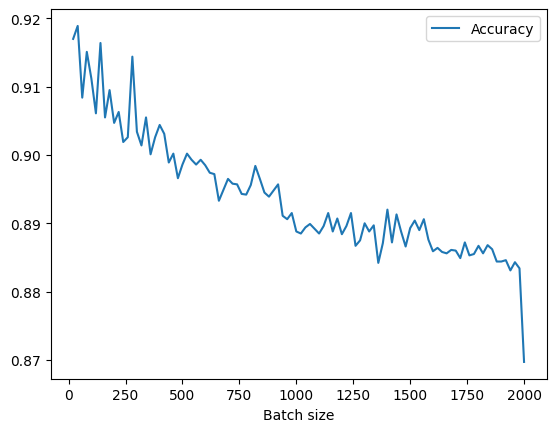

In [80]:
target_accuracy_fig = target_result.plot(x='Batch size', y='Accuracy', title='P2P Normal model (IID datasets)').get_figure()



# acc_fig.set(xlabel='Batch size', ylabel='Accuracy')

# saving the figure
fig_name = "IID/plots/IID_TargetEnc_accuracy_vs_batch_size_" + str(current_date) + ".png"



# acc_fig.ylabel("Accuracy")
# acc_fig.title("Accuracy of the Model")

target_accuracy_fig.patch.set_facecolor('xkcd:white')
target_accuracy_fig.savefig(fig_name,dpi = 150, bbox_inches="tight")

In [ ]:
target_precision_fig = target_result.plot(x='Batch size', y='Precision', title='P2P Normal model (IID datasets)').get_figure()


# saving the figure
fig_name = "IID/plots/IID_TargetEnc_precision_vs_batch_size_" + str(current_date) + ".png"


target_precision_fig.patch.set_facecolor('xkcd:white')
target_precision_fig.savefig(fig_name,dpi = 150, bbox_inches="tight")

In [ ]:
target_recall_fig = target_result.plot(x='Batch size', y='Recall', title='P2P Normal model (IID datasets)').get_figure()



# saving the figure
fig_name = "IID/plots/IID_TargetEnc_recall_vs_batch_size_" + str(current_date) + ".png"



target_recall_fig.patch.set_facecolor('xkcd:white')
target_recall_fig.savefig(fig_name,dpi = 150, bbox_inches="tight")

In [ ]:
# target_f1_fig = target_result.plot(x='Batch size', y="F1 score", title='P2P Normal model (IID datasets)').get_figure()

# # saving the figure
# fig_name = "IID/plots/TargetEnc_f1_score_vs_batch_size_" + str(current_date) + ".png"



# target_f1_fig.patch.set_facecolor('xkcd:white')
# target_f1_fig.savefig(fig_name,dpi = 150, bbox_inches="tight")

In [ ]:
# target_result.iloc[:,11]

In [18]:
target_f1_score = target_result.iloc[:,11].to_list()

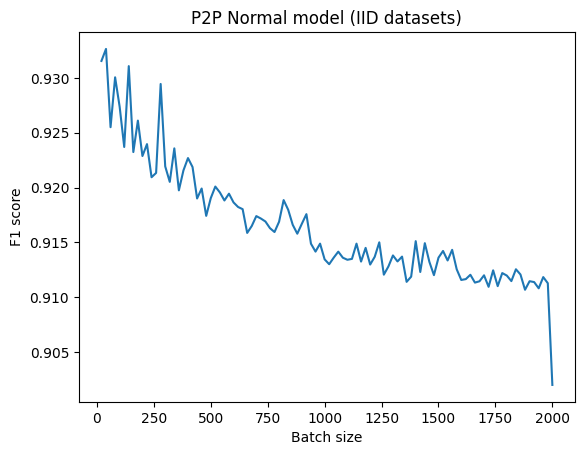

In [19]:
fig = plt.figure()
plt.plot(t_rounds, target_f1_score)

# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Batch size")
plt.ylabel("F1 score")
plt.title("P2P Normal model (IID datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
# plt.legend(loc='best')
  
# To load the display window
plt.show()

# saving the figure
fig_name = "IID/plots/IID_TargetEnc_f1_score_vs_batch_size_" + str(current_date) + ".png"

fig.patch.set_facecolor('xkcd:white')
fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

In [20]:
## For combine plotting
IID_target_f1_score = copy.deepcopy(target_f1_score)

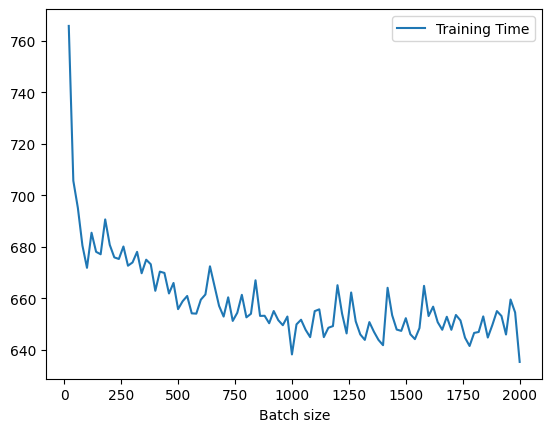

In [81]:
target_time_fig = target_result.plot(x='Batch size', y='Training Time', title='P2P Normal model (IID datasets)').get_figure()

# saving the figure
fig_name = "IID/plots/IID_TargetEnc_training_time_vs_batch_size_" + str(current_date) + ".png"

target_time_fig.patch.set_facecolor('xkcd:white')
target_time_fig.savefig(fig_name,dpi = 150, bbox_inches="tight")

In [ ]:
# target_result['Number of communications']

In [ ]:
t_comm = {}



for index in range(len(model_list)):
    model_name = "model_" + str(index)
    t_comm[model_name] = list()
    for row in range(len(target_result)):
        t_comm[model_name].append(target_result['Number of communications'][row][model_name])
    

In [ ]:
# for index in range(len(model_list)):
#     model_name = "model_" + str(index)
#     print(t_comm[model_name][-1])

In [ ]:
# #### loss_plt = {}

# fig = plt.figure()

# for index in range(len(model_list)):
#     model_name = "model_" + str(index)
#     plt.plot(t_rounds, t_comm[model_name], label=model_name)


# # Naming the x-axis, y-axis and the whole graph
# plt.xlabel("Batch size")
# plt.ylabel("Number of communications")
# plt.title("P2P Normal model (IID datasets)")
  
# # Adding legend, which helps us recognize the curve according to it's color
# plt.legend(loc='best')
  
# # To load the display window
# plt.show()


# # saving the figure
# fig_name = "IID/plots/IID_TargetEnc_communication_cost_vs_batch_size_" + str(current_date) + ".png"

# fig.patch.set_facecolor('xkcd:white')
# fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

In [ ]:
fig = plt.figure()

# for index in range(len(model_list)):
#     model_name = "model_" + str(index)
#     plt.plot(t_rounds, t_comm[model_name], label=model_name)

avg_communications = []

for row in range(len(t_rounds)):
    sum_communications = 0
    for index in range(len(model_list)):
        model_name = "model_" + str(index)
        sum_communications += t_comm[model_name][row]
    avg_communications.append(sum_communications/NUM_CLIENTS)    

plt.plot(t_rounds, avg_communications)




# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Batch size")
plt.ylabel("Average number of communications")
plt.title("P2P Normal model (IID datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
# plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),ncol=10)

  
# To load the display window
plt.show()


# saving the figure
fig_name = "IID/plots/IID_TargetEnc_avg_communication_cost_vs_batch_size_" + str(current_date) + ".png"

fig.patch.set_facecolor('xkcd:white')
fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

In [ ]:
# avg_communications

# Clustered

In [22]:
bcc_file = open("IID/IID_Clustered_13112022_batches.pkl", "rb")
clustered_result = pickle.load(bcc_file)
bcc_file.close()

In [23]:
clustered_result

,Traing data,Test data,Number of Clients,Batch size,Number of epochs,Number of rounds,anomaly_percentage,cluster_anomaly_percentage,random_anomaly_dic,Precision,Recall,F1_score,Accuracy,Training Time,Number of communications
0,200000,10000,100,20,10,50,0.6,"{'cluster_0': 0.6, 'cluster_1': 0.6, 'cluster_...","{'client_0': 0.5845, 'client_1': 0.5755, 'clie...","{'cluster_1': 0.922813315926893, 'cluster_0': ...","{'cluster_1': 0.9425, 'cluster_0': 0.951166666...","{'cluster_1': 0.9325527704485488, 'cluster_0':...","{'cluster_1': 0.9182, 'cluster_0': 0.92, 'clus...",803.563792,"{'model_0': 3244000, 'model_1': 3081800, 'mode..."
1,200000,10000,100,40,10,50,0.6,"{'cluster_0': 0.6, 'cluster_1': 0.6, 'cluster_...","{'client_0': 0.5845, 'client_1': 0.5755, 'clie...","{'cluster_0': 0.9230394544568924, 'cluster_1':...","{'cluster_0': 0.9475, 'cluster_1': 0.9395, 'cl...","{'cluster_0': 0.9351097952134222, 'cluster_1':...","{'cluster_0': 0.9211, 'cluster_1': 0.918, 'clu...",745.924725,"{'model_0': 3244000, 'model_1': 3081800, 'mode..."
2,200000,10000,100,60,10,50,0.6,"{'cluster_0': 0.6, 'cluster_1': 0.6, 'cluster_...","{'client_0': 0.5845, 'client_1': 0.5755, 'clie...","{'cluster_2': 0.920388349514563, 'cluster_0': ...","{'cluster_2': 0.948, 'cluster_0': 0.941, 'clus...","{'cluster_2': 0.9339901477832512, 'cluster_0':...","{'cluster_2': 0.9196, 'cluster_0': 0.9157, 'cl...",732.269060,"{'model_0': 3244000, 'model_1': 3081800, 'mode..."
3,200000,10000,100,80,10,50,0.6,"{'cluster_0': 0.6, 'cluster_1': 0.6, 'cluster_...","{'client_0': 0.5845, 'client_1': 0.5755, 'clie...","{'cluster_3': 0.9260598093986198, 'cluster_0':...","{'cluster_3': 0.9393333333333334, 'cluster_0':...","{'cluster_3': 0.9326493463511502, 'cluster_0':...","{'cluster_3': 0.9186, 'cluster_0': 0.9126, 'cl...",673.585896,"{'model_0': 3244000, 'model_1': 3081800, 'mode..."
4,200000,10000,100,100,10,50,0.6,"{'cluster_0': 0.6, 'cluster_1': 0.6, 'cluster_...","{'client_0': 0.5845, 'client_1': 0.5755, 'clie...","{'cluster_0': 0.9161821705426356, 'cluster_2':...","{'cluster_0': 0.9455, 'cluster_2': 0.940666666...","{'cluster_0': 0.9306102362204725, 'cluster_2':...","{'cluster_0': 0.9154, 'cluster_2': 0.9153, 'cl...",665.565410,"{'model_0': 3244000, 'model_1': 3081800, 'mode..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,200000,10000,100,1920,10,50,0.6,"{'cluster_0': 0.6, 'cluster_1': 0.6, 'cluster_...","{'client_0': 0.5845, 'client_1': 0.5755, 'clie...","{'cluster_0': 0.8508822678623084, 'cluster_2':...","{'cluster_0': 0.9805, 'cluster_2': 0.994333333...","{'cluster_0': 0.9111042279696454, 'cluster_2':...","{'cluster_0': 0.8852, 'cluster_2': 0.8836, 'cl...",690.914454,"{'model_0': 3244000, 'model_1': 3081800, 'mode..."
96,200000,10000,100,1940,10,50,0.6,"{'cluster_0': 0.6, 'cluster_1': 0.6, 'cluster_...","{'client_0': 0.5845, 'client_1': 0.5755, 'clie...","{'cluster_1': 0.8476422531173857, 'cluster_0':...","{'cluster_1': 0.9856666666666667, 'cluster_0':...","{'cluster_1': 0.9114587346844417, 'cluster_0':...","{'cluster_1': 0.8851, 'cluster_0': 0.8855, 'cl...",688.099334,"{'model_0': 3244000, 'model_1': 3081800, 'mode..."
97,200000,10000,100,1960,10,50,0.6,"{'cluster_0': 0.6, 'cluster_1': 0.6, 'cluster_...","{'client_0': 0.5845, 'client_1': 0.5755, 'clie...","{'cluster_1': 0.8396186737698024, 'cluster_0':...","{'cluster_1': 0.9981666666666666, 'cluster_0':...","{'cluster_1': 0.9120536054214574, 'cluster_0':...","{'cluster_1': 0.8845, 'cluster_0': 0.8843, 'cl...",697.149978,"{'model_0': 3244000, 'model_1': 3081800, 'mode..."
98,200000,10000,100,1980,10,50,0.6,"{'cluster_0': 0.6, 'cluster_1': 0.6, 'cluster_...","{'client_0': 0.5845, 'client_1': 0.5755, 'clie...","{'cluster_0': 0.8422316384180791, 'cluster_1':...","{'cluster_0': 0.9938333333333333, 'cluster_1':...","{'cluster_0': 0.9117737003058104, 'cluster_1':...","{'cluster_0': 0.8846, 'cluster_1': 0.8837, 'cl...",692.751995,"{'model_0': 3244000, 'model_1': 3081800, 'mode..."


In [24]:
c_rounds = np.array(clustered_result['Batch size']).tolist()
# print(c_rounds)

In [25]:
clustered_accuracy = {}
for cluster in cluster_list:
    clustered_accuracy[cluster] = list()
    for index in range(len(clustered_result)):
        clustered_accuracy[cluster].append(clustered_result['Accuracy'][index][cluster])

In [26]:
# clustered_accuracy = {}

# clustered_accuracy['cluster_0'] = list()
# clustered_accuracy['cluster_1'] = list()
# clustered_accuracy['cluster_2'] = list()

# for index in range(len(clustered_result)):
#     clustered_accuracy['cluster_0'].append(clustered_result['Accuracy'][index]['cluster_0'])
#     clustered_accuracy['cluster_1'].append(clustered_result['Accuracy'][index]['cluster_1'])
#     clustered_accuracy['cluster_2'].append(clustered_result['Accuracy'][index]['cluster_2'])

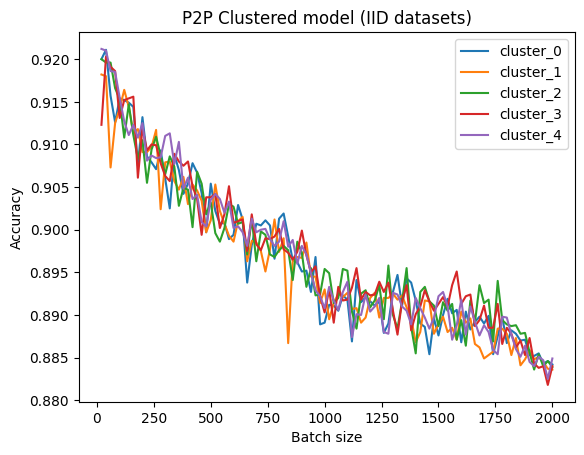

In [27]:

fig = plt.figure()

for index in range(NUM_CLUSTERS):
    cluster_name = cluster_list[index]
    plt.plot(c_rounds, clustered_accuracy[cluster_name], label=cluster_name)


# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Batch size")
plt.ylabel("Accuracy")
plt.title("P2P Clustered model (IID datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend(loc='best')
  
# To load the display window
plt.show()


# saving the figure
fig_name = "IID/plots/IID_clustered_accuracy_vs_batch_size_" + str(current_date) + ".png"

fig.patch.set_facecolor('xkcd:white')
fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

In [28]:
############ Average value ###################

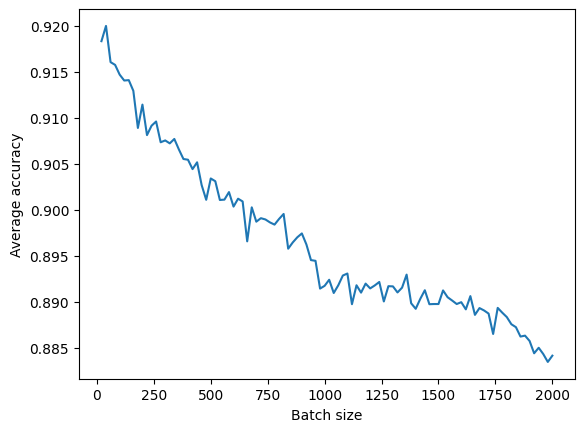

In [82]:
fig = plt.figure()

    
avg_cl_accuracy = []

for row in range(len(c_rounds)):
    sum_accuracy = 0
    for index in range(NUM_CLUSTERS):
        cluster_name = "cluster_" + str(index)
        sum_accuracy += clustered_accuracy[cluster_name][row]
    avg_cl_accuracy.append(sum_accuracy/NUM_CLUSTERS)    

plt.plot(c_rounds, avg_cl_accuracy)


# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Batch size")
plt.ylabel("Average accuracy")
plt.title("P2P Clustered model (IID datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
# plt.legend(loc='best')
  
# To load the display window
plt.show()


# saving the figure
fig_name = "IID/plots/IID_clustered_avg_accuracy_vs_batch_size_" + str(current_date) + ".png"

fig.patch.set_facecolor('xkcd:white')
fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

In [30]:
## For combine plotting
IID_clustered_accuracy = copy.deepcopy(avg_cl_accuracy)

In [ ]:
clustered_precision = {}
for cluster in cluster_list:
    clustered_precision[cluster] = list()
    for index in range(len(clustered_result)):
        clustered_precision[cluster].append(clustered_result['Precision'][index][cluster])

In [ ]:
# clustered_precision = {}

# clustered_precision['cluster_0'] = list()
# clustered_precision['cluster_1'] = list()
# clustered_precision['cluster_2'] = list()

# for index in range(len(clustered_result)):
#     clustered_precision['cluster_0'].append(clustered_result['Precision'][index]['cluster_0'])
#     clustered_precision['cluster_1'].append(clustered_result['Precision'][index]['cluster_1'])
#     clustered_precision['cluster_2'].append(clustered_result['Precision'][index]['cluster_2'])

In [ ]:
fig = plt.figure()

for index in range(NUM_CLUSTERS):
    cluster_name = cluster_list[index]
    plt.plot(c_rounds, clustered_precision[cluster_name], label=cluster_name)


# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Batch size")
plt.ylabel("Precision")
plt.title("P2P Clustered model (IID datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend(loc='best')
  
# To load the display window
plt.show()


# saving the figure
fig_name = "IID/plots/IID_clustered_precision_vs_batch_size_" + str(current_date) + ".png"

fig.patch.set_facecolor('xkcd:white')
fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

In [ ]:
clustered_recall = {}
for cluster in cluster_list:
    clustered_recall[cluster] = list()
    for index in range(len(clustered_result)):
        clustered_recall[cluster].append(clustered_result['Recall'][index][cluster])

In [ ]:
# clustered_recall = {}

# clustered_recall['cluster_0'] = list()
# clustered_recall['cluster_1'] = list()
# clustered_recall['cluster_2'] = list()

# for index in range(len(clustered_result)):
#     clustered_recall['cluster_0'].append(clustered_result['Recall'][index]['cluster_0'])
#     clustered_recall['cluster_1'].append(clustered_result['Recall'][index]['cluster_1'])
#     clustered_recall['cluster_2'].append(clustered_result['Recall'][index]['cluster_2'])

In [ ]:
fig = plt.figure()

for index in range(NUM_CLUSTERS):
    cluster_name = cluster_list[index]
    plt.plot(c_rounds, clustered_recall[cluster_name], label=cluster_name)


# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Batch size")
plt.ylabel("Recall")
plt.title("P2P Clustered model (IID datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend(loc='best')
  
# To load the display window
plt.show()


# saving the figure
fig_name = "IID/plots/IID_clustered_recall_vs_batch_size_" + str(current_date) + ".png"

fig.patch.set_facecolor('xkcd:white')
fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

In [ ]:
# clustered_f1_score = {}

# clustered_f1_score['cluster_0'] = list()
# clustered_f1_score['cluster_1'] = list()
# clustered_f1_score['cluster_2'] = list()

# for index in range(len(clustered_result)):
#     clustered_f1_score['cluster_0'].append(clustered_result['F1 score'][index]['cluster_0'])
#     clustered_f1_score['cluster_1'].append(clustered_result['F1 score'][index]['cluster_1'])
#     clustered_f1_score['cluster_2'].append(clustered_result['F1 score'][index]['cluster_2'])

In [ ]:
# fig = plt.figure()

# for index in range(NUM_CLUSTERS):
#     cluster_name = cluster_list[index]
#     plt.plot(c_rounds, clustered_f1_score[cluster_name], label=cluster_name)


# # Naming the x-axis, y-axis and the whole graph
# plt.xlabel("Batch size")
# plt.ylabel("F1 score")
# plt.title("P2P Clustered model (IID datasets)")
  
# # Adding legend, which helps us recognize the curve according to it's color
# plt.legend(loc='best')
  
# # To load the display window
# plt.show()


# # saving the figure
# fig_name = "IID/plots/IID_clustered_f1_score_vs_batch_size_" + str(current_date) + ".png"

# fig.patch.set_facecolor('xkcd:white')
# fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

In [31]:
clustered_f1_list = clustered_result.iloc[:,11].to_list()

In [32]:
clustered_f1_score = {}
for cluster in cluster_list:
    clustered_f1_score[cluster] = list()
    for index in range(len(clustered_result)):
        clustered_f1_score[cluster].append(clustered_f1_list[index][cluster])

In [33]:
# clustered_f1_score = {}

# clustered_f1_score['cluster_0'] = list()
# clustered_f1_score['cluster_1'] = list()
# clustered_f1_score['cluster_2'] = list()

# for index in range(len(clustered_result)):
#     clustered_f1_score['cluster_0'].append(clustered_f1_list[index]['cluster_0'])
#     clustered_f1_score['cluster_1'].append(clustered_f1_list[index]['cluster_1'])
#     clustered_f1_score['cluster_2'].append(clustered_f1_list[index]['cluster_2'])

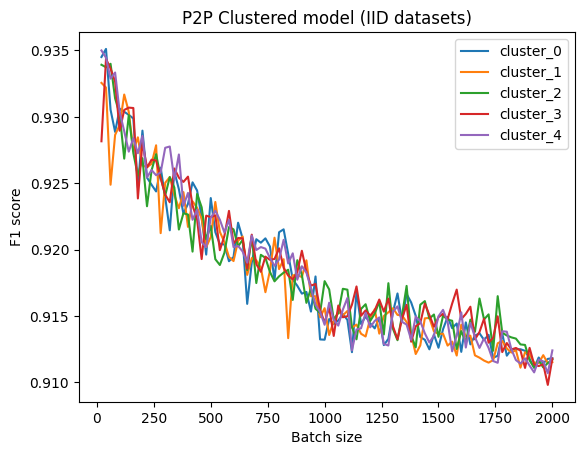

In [34]:
fig = plt.figure()

for index in range(NUM_CLUSTERS):
    cluster_name = cluster_list[index]
    plt.plot(c_rounds, clustered_f1_score[cluster_name], label=cluster_name)


# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Batch size")
plt.ylabel("F1 score")
plt.title("P2P Clustered model (IID datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend(loc='best')
  
# To load the display window
plt.show()


# saving the figure
fig_name = "IID/plots/IID_clustered_f1_score_vs_batch_size_" + str(current_date) + ".png"

fig.patch.set_facecolor('xkcd:white')
fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

In [35]:
############ Average value ###################

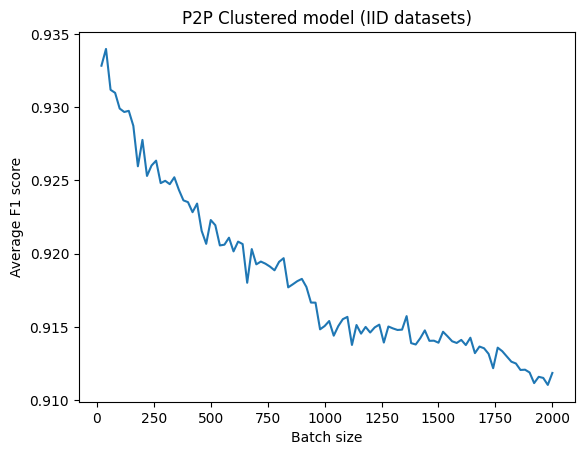

In [36]:
fig = plt.figure()


    
avg_cl_f1_score = []

for row in range(len(c_rounds)):
    sum_f1_score = 0
    for index in range(NUM_CLUSTERS):
        cluster_name = "cluster_" + str(index)
        sum_f1_score += clustered_f1_score[cluster_name][row]
    avg_cl_f1_score.append(sum_f1_score/NUM_CLUSTERS)    

plt.plot(c_rounds, avg_cl_f1_score)


# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Batch size")
plt.ylabel("Average F1 score")
plt.title("P2P Clustered model (IID datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
# plt.legend(loc='best')
  
# To load the display window
plt.show()


# saving the figure
fig_name = "IID/plots/IID_clustered_avg_f1_score_vs_batch_size_" + str(current_date) + ".png"

fig.patch.set_facecolor('xkcd:white')
fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

In [37]:
### For combine plotting
IID_clustered_f1_score = copy.deepcopy(avg_cl_f1_score)

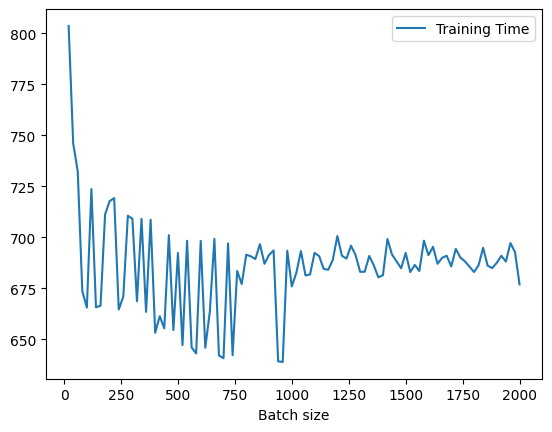

In [83]:
clustered_time_fig = clustered_result.plot(x='Batch size', y='Training Time', title='P2P Clustered model (IID datasets)').get_figure()

# saving the figure
fig_name = "IID/plots/IID_Clustered_training_time_vs_batch_size_" + str(current_date) + ".png"

clustered_time_fig.patch.set_facecolor('xkcd:white')
clustered_time_fig.savefig(fig_name,dpi = 150, bbox_inches="tight")

In [ ]:
c_comm = {}

for index in range(len(model_list)):
    model_name = "model_" + str(index)
    c_comm[model_name] = list()
    for row in range(len(clustered_result)):
        c_comm[model_name].append(clustered_result['Number of communications'][row][model_name])

In [ ]:
# for index in range(len(model_list)):
#     model_name = "model_" + str(index)
#     print(c_comm[model_name][-1])

In [ ]:

# fig = plt.figure()

# for index in range(len(model_list)):
#     model_name = "model_" + str(index)
#     plt.plot(c_rounds, c_comm[model_name], label=model_name)


# # Naming the x-axis, y-axis and the whole graph
# plt.xlabel("Batch size")
# plt.ylabel("Number of communications")
# plt.title("P2P Clustered model (IID datasets)")
  
# # Adding legend, which helps us recognize the curve according to it's color
# plt.legend(loc='best')
  
# # To load the display window
# plt.show()


# # saving the figure
# fig_name = "IID/plots/IID_Clustered_communication_cost_vs_batch_size_" + str(current_date) + ".png"

# fig.patch.set_facecolor('xkcd:white')
# fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

In [ ]:
fig = plt.figure()

# for index in range(len(model_list)):
#     model_name = "model_" + str(index)
#     plt.plot(c_rounds, c_comm[model_name], label=model_name)


avg_communications = []

for row in range(len(c_rounds)):
    sum_communications = 0
    for index in range(len(model_list)):
        model_name = "model_" + str(index)
        sum_communications += c_comm[model_name][row]
    avg_communications.append(sum_communications/NUM_CLIENTS)    

plt.plot(c_rounds, avg_communications)



# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Batch size")
plt.ylabel("Average number of communications")
plt.title("P2P Clustered model (IID datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
# plt.legend(loc='best')
  
# To load the display window
plt.show()


# saving the figure
fig_name = "IID/plots/IID_Clustered_avg_communication_cost_vs_batch_size_" + str(current_date) + ".png"

fig.patch.set_facecolor('xkcd:white')
fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

In [ ]:
# avg_communications

# Hierarchical

In [39]:
ccc_file = open("IID/IID_Hierarchical_13112022_batches.pkl", "rb")
hierarchical_result = pickle.load(ccc_file)
ccc_file.close()

In [40]:
hierarchical_result

,Traing data,Test data,Number of Clients,Batch size,Number of epochs,Number of rounds,anomaly_percentage,cluster_anomaly_percentage,random_anomaly_dic,Precision,Recall,F1_score,Accuracy,Training Time,Number of communications
0,200000,10000,100,20,10,50,0.6,"{'cluster_0': 0.6, 'cluster_1': 0.6, 'cluster_...","{'client_0': 0.5845, 'client_1': 0.5755, 'clie...","{'cluster_0': 0.9211346122315134, 'cluster_1':...","{'cluster_0': 0.9363333333333334, 'cluster_1':...","{'cluster_0': 0.9286717910571123, 'cluster_1':...","{'cluster_0': 0.9137, 'cluster_1': 0.9148, 'cl...",804.589774,"{'model_0': 3282928, 'model_1': 3081800, 'mode..."
1,200000,10000,100,40,10,50,0.6,"{'cluster_0': 0.6, 'cluster_1': 0.6, 'cluster_...","{'client_0': 0.5845, 'client_1': 0.5755, 'clie...","{'cluster_2': 0.9020446980504042, 'cluster_3':...","{'cluster_2': 0.9485, 'cluster_3': 0.946666666...","{'cluster_2': 0.9246892517669998, 'cluster_3':...","{'cluster_2': 0.9073, 'cluster_3': 0.908, 'clu...",743.076021,"{'model_0': 3282928, 'model_1': 3081800, 'mode..."
2,200000,10000,100,60,10,50,0.6,"{'cluster_0': 0.6, 'cluster_1': 0.6, 'cluster_...","{'client_0': 0.5845, 'client_1': 0.5755, 'clie...","{'cluster_0': 0.9015978484417022, 'cluster_1':...","{'cluster_0': 0.9498333333333333, 'cluster_1':...","{'cluster_0': 0.9250872494115736, 'cluster_1':...","{'cluster_0': 0.9077, 'cluster_1': 0.9083, 'cl...",734.072548,"{'model_0': 3282928, 'model_1': 3081800, 'mode..."
3,200000,10000,100,80,10,50,0.6,"{'cluster_0': 0.6, 'cluster_1': 0.6, 'cluster_...","{'client_0': 0.5845, 'client_1': 0.5755, 'clie...","{'cluster_0': 0.9091346153846154, 'cluster_1':...","{'cluster_0': 0.9455, 'cluster_1': 0.950333333...","{'cluster_0': 0.9269607843137255, 'cluster_1':...","{'cluster_0': 0.9106, 'cluster_1': 0.9108, 'cl...",711.371881,"{'model_0': 3282928, 'model_1': 3081800, 'mode..."
4,200000,10000,100,100,10,50,0.6,"{'cluster_0': 0.6, 'cluster_1': 0.6, 'cluster_...","{'client_0': 0.5845, 'client_1': 0.5755, 'clie...","{'cluster_1': 0.8994307400379506, 'cluster_0':...","{'cluster_1': 0.948, 'cluster_0': 0.9466666666...","{'cluster_1': 0.923076923076923, 'cluster_0': ...","{'cluster_1': 0.9052, 'cluster_0': 0.9046, 'cl...",710.246382,"{'model_0': 3282928, 'model_1': 3081800, 'mode..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,200000,10000,100,1920,10,50,0.6,"{'cluster_0': 0.6, 'cluster_1': 0.6, 'cluster_...","{'client_0': 0.5845, 'client_1': 0.5755, 'clie...","{'cluster_0': 0.8415492957746479, 'cluster_1':...","{'cluster_0': 0.9958333333333333, 'cluster_1':...","{'cluster_0': 0.9122137404580153, 'cluster_1':...","{'cluster_0': 0.885, 'cluster_1': 0.8846, 'clu...",686.010164,"{'model_0': 3282928, 'model_1': 3081800, 'mode..."
96,200000,10000,100,1940,10,50,0.6,"{'cluster_0': 0.6, 'cluster_1': 0.6, 'cluster_...","{'client_0': 0.5845, 'client_1': 0.5755, 'clie...","{'cluster_0': 0.8413169422071499, 'cluster_2':...","{'cluster_0': 0.9923333333333333, 'cluster_2':...","{'cluster_0': 0.9106064081975987, 'cluster_2':...","{'cluster_0': 0.8831, 'cluster_2': 0.8839, 'cl...",683.790026,"{'model_0': 3282928, 'model_1': 3081800, 'mode..."
97,200000,10000,100,1960,10,50,0.6,"{'cluster_0': 0.6, 'cluster_1': 0.6, 'cluster_...","{'client_0': 0.5845, 'client_1': 0.5755, 'clie...","{'cluster_1': 0.8388001121390525, 'cluster_0':...","{'cluster_1': 0.9973333333333333, 'cluster_0':...","{'cluster_1': 0.9112227805695142, 'cluster_0':...","{'cluster_1': 0.8834, 'cluster_0': 0.8838, 'cl...",699.476594,"{'model_0': 3282928, 'model_1': 3081800, 'mode..."
98,200000,10000,100,1980,10,50,0.6,"{'cluster_0': 0.6, 'cluster_1': 0.6, 'cluster_...","{'client_0': 0.5845, 'client_1': 0.5755, 'clie...","{'cluster_0': 0.8384701597086018, 'cluster_2':...","{'cluster_0': 0.9975, 'cluster_2': 0.995833333...","{'cluster_0': 0.9110975795402648, 'cluster_2':...","{'cluster_0': 0.8832, 'cluster_2': 0.8834, 'cl...",691.263144,"{'model_0': 3282928, 'model_1': 3081800, 'mode..."


In [41]:
hierarchical_result['Accuracy'][2]


{'cluster_0': 0.9077,
 'cluster_1': 0.9083,
 'cluster_2': 0.9083,
 'cluster_3': 0.9079,
 'cluster_4': 0.9091}

In [42]:
h_rounds = np.array(hierarchical_result['Batch size']).tolist()
# print(h_rounds)

In [43]:
hierarchical_accuracy = {}
for cluster in cluster_list:
    hierarchical_accuracy[cluster] = list()
    for index in range(len(hierarchical_result)):
        hierarchical_accuracy[cluster].append(hierarchical_result['Accuracy'][index][cluster])

In [44]:
# hierarchical_accuracy = {}

# hierarchical_accuracy['cluster_0'] = list()
# hierarchical_accuracy['cluster_1'] = list()
# hierarchical_accuracy['cluster_2'] = list()

# for index in range(len(hierarchical_result)):
#     hierarchical_accuracy['cluster_0'].append(hierarchical_result['Accuracy'][index]['cluster_0'])
#     hierarchical_accuracy['cluster_1'].append(hierarchical_result['Accuracy'][index]['cluster_1'])
#     hierarchical_accuracy['cluster_2'].append(hierarchical_result['Accuracy'][index]['cluster_2'])

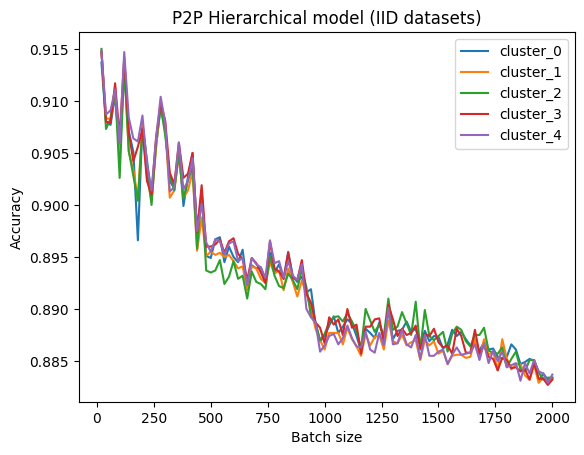

In [45]:

fig = plt.figure()

for index in range(NUM_CLUSTERS):
    cluster_name = cluster_list[index]
    plt.plot(h_rounds, hierarchical_accuracy[cluster_name], label=cluster_name)


# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Batch size")
plt.ylabel("Accuracy")
plt.title("P2P Hierarchical model (IID datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend(loc='best')
  
# To load the display window
plt.show()


# saving the figure
fig_name = "IID/plots/IID_hierarchical_accuracy_vs_batch_size_" + str(current_date) + ".png"

fig.patch.set_facecolor('xkcd:white')
fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

In [46]:
#### Average #####

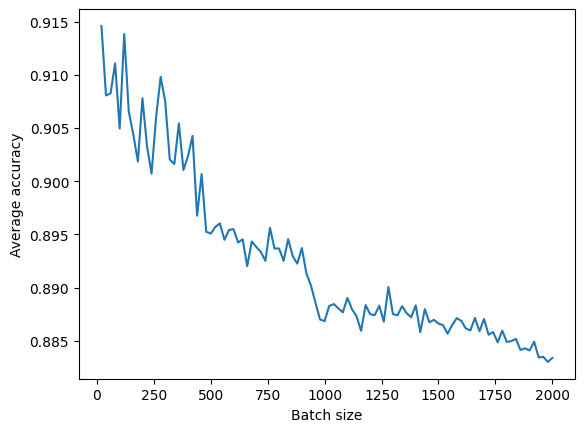

In [84]:
fig = plt.figure()

   
avg_hier_accuracy = []

for row in range(len(h_rounds)):
    sum_accuracy = 0
    for index in range(NUM_CLUSTERS):
        cluster_name = "cluster_" + str(index)
        sum_accuracy += hierarchical_accuracy[cluster_name][row]
    avg_hier_accuracy.append(sum_accuracy/NUM_CLUSTERS)    

plt.plot(h_rounds, avg_hier_accuracy)


# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Batch size")
plt.ylabel("Average accuracy")
plt.title("P2P Hierarchical model (IID datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
# plt.legend(loc='best')
  
# To load the display window
plt.show()


# saving the figure
fig_name = "IID/plots/IID_Hierarchical_avg_accuracy_vs_batch_size_" + str(current_date) + ".png"

fig.patch.set_facecolor('xkcd:white')
fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

In [48]:
### For combine plotting
IID_hierarchical_accuracy = copy.deepcopy(avg_hier_accuracy)

In [ ]:
hierarchical_precision = {}
for cluster in cluster_list:
    hierarchical_precision[cluster] = list()
    for index in range(len(hierarchical_result)):
        hierarchical_precision[cluster].append(hierarchical_result['Precision'][index][cluster])

In [ ]:
# hierarchical_precision = {}

# hierarchical_precision['cluster_0'] = list()
# hierarchical_precision['cluster_1'] = list()
# hierarchical_precision['cluster_2'] = list()

# for index in range(len(hierarchical_result)):
#     hierarchical_precision['cluster_0'].append(hierarchical_result['Precision'][index]['cluster_0'])
#     hierarchical_precision['cluster_1'].append(hierarchical_result['Precision'][index]['cluster_1'])
#     hierarchical_precision['cluster_2'].append(hierarchical_result['Precision'][index]['cluster_2'])

In [ ]:

fig = plt.figure()

for index in range(NUM_CLUSTERS):
    cluster_name = cluster_list[index]
    plt.plot(h_rounds, hierarchical_precision[cluster_name], label=cluster_name)


# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Batch size")
plt.ylabel("Precision")
plt.title("P2P Hierarchical model (IID datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend(loc='best')
  
# To load the display window
plt.show()


# saving the figure
fig_name = "IID/plots/IID_hierarchical_precision_vs_batch_size_" + str(current_date) + ".png"

fig.patch.set_facecolor('xkcd:white')
fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

In [ ]:
hierarchical_recall = {}
for cluster in cluster_list:
    hierarchical_recall[cluster] = list()
    for index in range(len(hierarchical_result)):
        hierarchical_recall[cluster].append(hierarchical_result['Recall'][index][cluster])

In [ ]:
# hierarchical_recall = {}

# hierarchical_recall['cluster_0'] = list()
# hierarchical_recall['cluster_1'] = list()
# hierarchical_recall['cluster_2'] = list()

# for index in range(len(hierarchical_result)):
#     hierarchical_recall['cluster_0'].append(hierarchical_result['Recall'][index]['cluster_0'])
#     hierarchical_recall['cluster_1'].append(hierarchical_result['Recall'][index]['cluster_1'])
#     hierarchical_recall['cluster_2'].append(hierarchical_result['Recall'][index]['cluster_2'])

In [ ]:

fig = plt.figure()

for index in range(NUM_CLUSTERS):
    cluster_name = cluster_list[index]
    plt.plot(h_rounds, hierarchical_recall[cluster_name], label=cluster_name)


# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Batch size")
plt.ylabel("Recall")
plt.title("P2P Hierarchical model (IID datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend(loc='best')
  
# To load the display window
plt.show()


# saving the figure
fig_name = "IID/plots/IID_hierarchical_recall_vs_batch_size_" + str(current_date) + ".png"

fig.patch.set_facecolor('xkcd:white')
fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

In [ ]:
# hierarchical_f1_score = {}

# hierarchical_f1_score['cluster_0'] = list()
# hierarchical_f1_score['cluster_1'] = list()
# hierarchical_f1_score['cluster_2'] = list()

# for index in range(len(hierarchical_result)):
#     hierarchical_f1_score['cluster_0'].append(hierarchical_result['F1 score'][index]['cluster_0'])
#     hierarchical_f1_score['cluster_1'].append(hierarchical_result['F1 score'][index]['cluster_1'])
#     hierarchical_f1_score['cluster_2'].append(hierarchical_result['F1 score'][index]['cluster_2'])

In [ ]:

# fig = plt.figure()

# for index in range(NUM_CLUSTERS):
#     cluster_name = cluster_list[index]
#     plt.plot(h_rounds, hierarchical_f1_score[cluster_name], label=cluster_name)


# # Naming the x-axis, y-axis and the whole graph
# plt.xlabel("Batch size")
# plt.ylabel("F1 score")
# plt.title("P2P Hierarchical model (IID datasets)")
  
# # Adding legend, which helps us recognize the curve according to it's color
# plt.legend(loc='best')
  
# # To load the display window
# plt.show()


# # saving the figure
# fig_name = "IID/plots/IID_hierarchical_f1_score_vs_batch_size_" + str(current_date) + ".png"

# fig.patch.set_facecolor('xkcd:white')
# fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

In [49]:
hierarchical_f1_list = hierarchical_result.iloc[:,11].to_list()

In [50]:
hierarchical_f1_score = {}
for cluster in cluster_list:
    hierarchical_f1_score[cluster] = list()
    for index in range(len(hierarchical_result)):
        hierarchical_f1_score[cluster].append(hierarchical_f1_list[index][cluster])

In [51]:
# hierarchical_f1_score = {}

# hierarchical_f1_score['cluster_0'] = list()
# hierarchical_f1_score['cluster_1'] = list()
# hierarchical_f1_score['cluster_2'] = list()

# for index in range(len(hierarchical_result)):
#     hierarchical_f1_score['cluster_0'].append(hierarchical_f1_list[index]['cluster_0'])
#     hierarchical_f1_score['cluster_1'].append(hierarchical_f1_list[index]['cluster_1'])
#     hierarchical_f1_score['cluster_2'].append(hierarchical_f1_list[index]['cluster_2'])

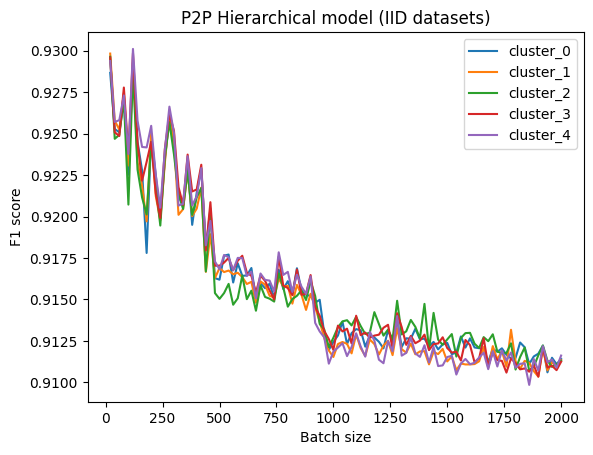

In [52]:
fig = plt.figure()

for index in range(NUM_CLUSTERS):
    cluster_name = cluster_list[index]
    plt.plot(h_rounds, hierarchical_f1_score[cluster_name], label=cluster_name)


# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Batch size")
plt.ylabel("F1 score")
plt.title("P2P Hierarchical model (IID datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend(loc='best')
  
# To load the display window
plt.show()


# saving the figure
fig_name = "IID/plots/IID_hierarchical_f1_score_vs_batch_size_" + str(current_date) + ".png"

fig.patch.set_facecolor('xkcd:white')
fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

In [53]:
#### Average

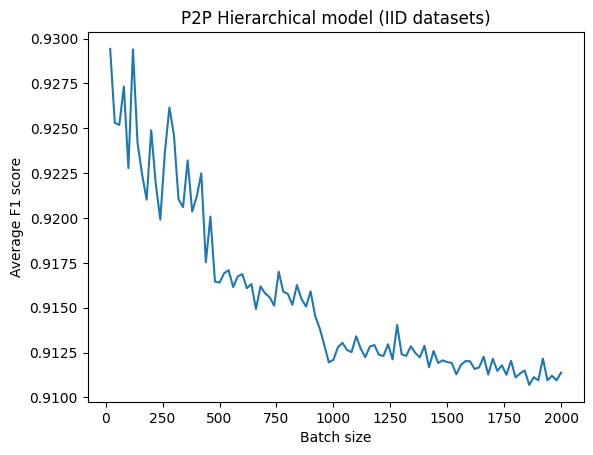

In [54]:
fig = plt.figure()

    
avg_hier_f1_score = []

for row in range(len(h_rounds)):
    sum_f1_score = 0
    for index in range(NUM_CLUSTERS):
        cluster_name = "cluster_" + str(index)
        sum_f1_score += hierarchical_f1_score[cluster_name][row]
    avg_hier_f1_score.append(sum_f1_score/NUM_CLUSTERS)    

plt.plot(h_rounds, avg_hier_f1_score)


# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Batch size")
plt.ylabel("Average F1 score")
plt.title("P2P Hierarchical model (IID datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
# plt.legend(loc='best')
  
# To load the display window
plt.show()


# saving the figure
fig_name = "IID/plots/IID_Hierarchical_avg_f1_score_vs_batch_size_" + str(current_date) + ".png"

fig.patch.set_facecolor('xkcd:white')

fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

In [55]:
### for combine plotting
IID_hierarchical_f1_score = copy.deepcopy(avg_hier_f1_score)

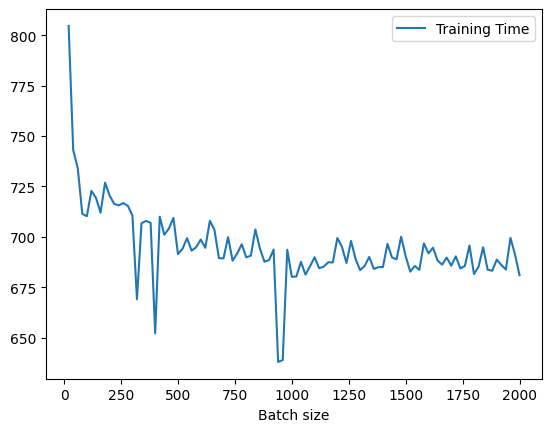

In [85]:
hierarchical_time_fig = hierarchical_result.plot(x='Batch size', y='Training Time', title='P2P Hierarchical model (IID datasets)').get_figure()

# saving the figure
fig_name = "IID/plots/IID_Hierarchical_training_time_vs_batch_size_" + str(current_date) + ".png"

hierarchical_time_fig.patch.set_facecolor('xkcd:white')
hierarchical_time_fig.savefig(fig_name,dpi = 150, bbox_inches="tight")

In [ ]:
h_comm = {}

for index in range(len(model_list)):
    model_name = "model_" + str(index)
    h_comm[model_name] = list()
    for row in range(len(hierarchical_result)):
        h_comm[model_name].append(hierarchical_result['Number of communications'][row][model_name])

In [ ]:
# for index in range(len(model_list)):
#     model_name = "model_" + str(index)
#     print(h_comm[model_name][-1])

In [ ]:

# fig = plt.figure()

# for index in range(len(model_list)):
#     model_name = "model_" + str(index)
#     plt.plot(h_rounds, h_comm[model_name], label=model_name)


# # Naming the x-axis, y-axis and the whole graph
# plt.xlabel("Batch size")
# plt.ylabel("Number of communications")
# plt.title("P2P Hierarchical model (IID datasets)")
  
# # Adding legend, which helps us recognize the curve according to it's color
# plt.legend(loc='best')
  
# # To load the display window
# plt.show()


# # saving the figure
# fig_name = "IID/plots/IID_Hierarchical_communication_cost_vs_batch_size_" + str(current_date) + ".png"

# fig.patch.set_facecolor('xkcd:white')
# fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

In [ ]:
fig = plt.figure()

# for index in range(len(model_list)):
#     model_name = "model_" + str(index)
#     plt.plot(h_rounds, h_comm[model_name], label=model_name)

    
avg_communications = []

for row in range(len(h_rounds)):
    sum_communications = 0
    for index in range(len(model_list)):
        model_name = "model_" + str(index)
        sum_communications += h_comm[model_name][row]
    avg_communications.append(sum_communications/NUM_CLIENTS)    

plt.plot(h_rounds, avg_communications)


# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Batch size")
plt.ylabel("Average number of communications")
plt.title("P2P Hierarchical model (IID datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
# plt.legend(loc='best')
  
# To load the display window
plt.show()


# saving the figure
fig_name = "IID/plots/IID_Hierarchical_avg_communication_cost_vs_batch_size_" + str(current_date) + ".png"

fig.patch.set_facecolor('xkcd:white')
fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

In [ ]:
# avg_communications

# General

In [57]:
gcc_file = open("IID/IID_General_13112022_batches.pkl", "rb")
general_result = pickle.load(gcc_file)
gcc_file.close()

In [58]:
general_result

,Traing data,Test data,Number of Clients,Batch size,Number of epochs,Number of rounds,anomaly_percentage,cluster_anomaly_percentage,random_anomaly_dic,Precision,Recall,F1_score,Accuracy,Training Time,Number of communications
0,200000,10000,100,20,10,50,0.6,"{'cluster_0': 0.6, 'cluster_1': 0.6, 'cluster_...","{'client_0': 0.5845, 'client_1': 0.5755, 'clie...","{'model_0': 0.9398821898821899, 'model_2': 0.9...","{'model_0': 0.9041666666666667, 'model_2': 0.9...","{'model_0': 0.921678559293238, 'model_2': 0.92...","{'model_0': 0.9078, 'model_2': 0.9044, 'model_...",856.130360,"{'model_0': 0, 'model_1': 0, 'model_2': 0, 'mo..."
1,200000,10000,100,40,10,50,0.6,"{'cluster_0': 0.6, 'cluster_1': 0.6, 'cluster_...","{'client_0': 0.5845, 'client_1': 0.5755, 'clie...","{'model_0': 0.9357860671095214, 'model_1': 0.9...","{'model_0': 0.9156666666666666, 'model_1': 0.9...","{'model_0': 0.9256170499536686, 'model_1': 0.9...","{'model_0': 0.9117, 'model_1': 0.9169, 'model_...",817.285841,"{'model_0': 0, 'model_1': 0, 'model_2': 0, 'mo..."
2,200000,10000,100,60,10,50,0.6,"{'cluster_0': 0.6, 'cluster_1': 0.6, 'cluster_...","{'client_0': 0.5845, 'client_1': 0.5755, 'clie...","{'model_0': 0.9012991128010139, 'model_2': 0.9...","{'model_0': 0.9481666666666667, 'model_2': 0.9...","{'model_0': 0.9241390513320339, 'model_2': 0.9...","{'model_0': 0.9066, 'model_2': 0.9079, 'model_...",801.939766,"{'model_0': 0, 'model_1': 0, 'model_2': 0, 'mo..."
3,200000,10000,100,80,10,50,0.6,"{'cluster_0': 0.6, 'cluster_1': 0.6, 'cluster_...","{'client_0': 0.5845, 'client_1': 0.5755, 'clie...","{'model_0': 0.9063945144315101, 'model_1': 0.9...","{'model_0': 0.9473333333333334, 'model_1': 0.9...","{'model_0': 0.9264118653736453, 'model_1': 0.9...","{'model_0': 0.9097, 'model_1': 0.913, 'model_2...",778.744225,"{'model_0': 0, 'model_1': 0, 'model_2': 0, 'mo..."
4,200000,10000,100,100,10,50,0.6,"{'cluster_0': 0.6, 'cluster_1': 0.6, 'cluster_...","{'client_0': 0.5845, 'client_1': 0.5755, 'clie...","{'model_0': 0.921331566743955, 'model_1': 0.91...","{'model_0': 0.9271666666666667, 'model_1': 0.9...","{'model_0': 0.9242399069612892, 'model_1': 0.9...","{'model_0': 0.9088, 'model_1': 0.9122, 'model_...",818.919694,"{'model_0': 0, 'model_1': 0, 'model_2': 0, 'mo..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,200000,10000,100,1920,10,50,0.6,"{'cluster_0': 0.6, 'cluster_1': 0.6, 'cluster_...","{'client_0': 0.5845, 'client_1': 0.5755, 'clie...","{'model_0': 0.8750379593076222, 'model_1': 0.8...","{'model_0': 0.9605, 'model_1': 0.98, 'model_2'...","{'model_0': 0.915779437470205, 'model_1': 0.91...","{'model_0': 0.894, 'model_1': 0.8874, 'model_2...",791.794923,"{'model_0': 0, 'model_1': 0, 'model_2': 0, 'mo..."
96,200000,10000,100,1940,10,50,0.6,"{'cluster_0': 0.6, 'cluster_1': 0.6, 'cluster_...","{'client_0': 0.5845, 'client_1': 0.5755, 'clie...","{'model_1': 0.8522907934672641, 'model_0': 0.8...","{'model_1': 0.9828333333333333, 'model_0': 0.9...","{'model_1': 0.9129189565755863, 'model_0': 0.9...","{'model_1': 0.8875, 'model_0': 0.8959, 'model_...",755.516299,"{'model_0': 0, 'model_1': 0, 'model_2': 0, 'mo..."
97,200000,10000,100,1960,10,50,0.6,"{'cluster_0': 0.6, 'cluster_1': 0.6, 'cluster_...","{'client_0': 0.5845, 'client_1': 0.5755, 'clie...","{'model_0': 0.8678057553956835, 'model_1': 0.8...","{'model_0': 0.965, 'model_1': 0.97916666666666...","{'model_0': 0.9138257575757577, 'model_1': 0.9...","{'model_0': 0.8908, 'model_1': 0.8877, 'model_...",786.340281,"{'model_0': 0, 'model_1': 0, 'model_2': 0, 'mo..."
98,200000,10000,100,1980,10,50,0.6,"{'cluster_0': 0.6, 'cluster_1': 0.6, 'cluster_...","{'client_0': 0.5845, 'client_1': 0.5755, 'clie...","{'model_0': 0.8438476840011366, 'model_2': 0.8...","{'model_0': 0.9898333333333333, 'model_2': 0.9...","{'model_0': 0.911029298972235, 'model_2': 0.91...","{'model_0': 0.884, 'model_2': 0.8861, 'model_1...",767.091330,"{'model_0': 0, 'model_1': 0, 'model_2': 0, 'mo..."


In [59]:
g_rounds = np.array(general_result['Batch size']).tolist()
# print(g_rounds)

In [60]:
general_accuracy = {}

for index in range(len(model_list)):
    model_name = "model_" + str(index)
    general_accuracy[model_name] = list()
    for row in range(len(general_result)):
        general_accuracy[model_name].append(general_result['Accuracy'][row][model_name])

In [61]:

# fig = plt.figure()

# for index in range(len(model_list)):
#     model_name = "model_" + str(index)
#     plt.plot(g_rounds, general_accuracy[model_name], label=model_name)


# # Naming the x-axis, y-axis and the whole graph
# plt.xlabel("Batch size")
# plt.ylabel("Accuracy")
# plt.title("General model (IID datasets)")
  
# # Adding legend, which helps us recognize the curve according to it's color
# plt.legend(loc='best')
  
# # To load the display window
# plt.show()


# # saving the figure
# fig_name = "IID/plots/IID_general_accuracy_vs_batch_size_" + str(current_date) + ".png"

# fig.patch.set_facecolor('xkcd:white')
# fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

In [62]:
# general_accuracy[model_name]

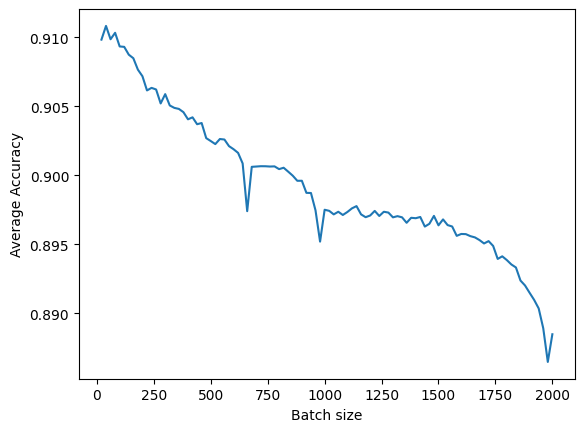

In [86]:
fig = plt.figure()
avg_general_accuracy = []

for row in range(len(g_rounds)):
    sum_accuracy = 0
    for index in range(len(model_list)):
        model_name = "model_" + str(index)
        sum_accuracy += general_accuracy[model_name][row]
    avg_general_accuracy.append(sum_accuracy/len(model_list))    

plt.plot(g_rounds, avg_general_accuracy)

# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Batch size")
plt.ylabel("Average Accuracy")
plt.title("General model (IID datasets)")
  
# # Adding legend, which helps us recognize the curve according to it's color
# plt.legend(loc='best')
  
# # To load the display window
# plt.show()


# saving the figure
fig_name = "IID/plots/IID_general_avg_general_accuracy_vs_batch_size_" + str(current_date) + ".png"

fig.patch.set_facecolor('xkcd:white')
fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

In [64]:
#### For combine plotting
IID_general_accuracy = copy.deepcopy(avg_general_accuracy)

In [ ]:
general_precision = {}

for index in range(len(model_list)):
    model_name = "model_" + str(index)
    general_precision[model_name] = list()
    for row in range(len(general_result)):
        general_precision[model_name].append(general_result['Precision'][row][model_name])

In [ ]:

# fig = plt.figure()

# for index in range(len(model_list)):
#     model_name = "model_" + str(index)
#     plt.plot(g_rounds, general_precision[model_name], label=model_name)


# # Naming the x-axis, y-axis and the whole graph
# plt.xlabel("Batch size")
# plt.ylabel("Precision")
# plt.title("General model (IID datasets)")
  
# # Adding legend, which helps us recognize the curve according to it's color
# plt.legend(loc='best')
  
# # To load the display window
# plt.show()


# # saving the figure
# fig_name = "IID/plots/IID_general_precision_vs_batch_size_" + str(current_date) + ".png"

# fig.patch.set_facecolor('xkcd:white')
# fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

In [ ]:
fig = plt.figure()

avg_precision = []

for row in range(len(g_rounds)):
    sum_precision = 0
    for index in range(len(model_list)):
        model_name = "model_" + str(index)
        sum_precision += general_precision[model_name][row]
    avg_precision.append(sum_precision/len(model_list))    

plt.plot(g_rounds, avg_precision)


# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Batch size")
plt.ylabel("Average Precision")
plt.title("General model (IID datasets)")
  
# # Adding legend, which helps us recognize the curve according to it's color
# plt.legend(loc='best')
  
# # To load the display window
# plt.show()


# saving the figure
fig_name = "IID/plots/IID_general_avg_precision_vs_batch_size_" + str(current_date) + ".png"

fig.patch.set_facecolor('xkcd:white')
fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

In [ ]:
general_recall = {}

for index in range(len(model_list)):
    model_name = "model_" + str(index)
    general_recall[model_name] = list()
    for row in range(len(general_result)):
        general_recall[model_name].append(general_result['Recall'][row][model_name])

In [ ]:

# fig = plt.figure()

# for index in range(len(model_list)):
#     model_name = "model_" + str(index)
#     plt.plot(g_rounds, general_recall[model_name], label=model_name)


# # Naming the x-axis, y-axis and the whole graph
# plt.xlabel("Batch size")
# plt.ylabel("Recall")
# plt.title("General model (IID datasets)")
  
# # Adding legend, which helps us recognize the curve according to it's color
# plt.legend(loc='best')
  
# # To load the display window
# plt.show()


# # saving the figure
# fig_name = "IID/plots/IID_general_recall_vs_batch_size_" + str(current_date) + ".png"

# fig.patch.set_facecolor('xkcd:white')
# fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

In [ ]:
fig = plt.figure()

avg_recall = []

for row in range(len(g_rounds)):
    sum_recall = 0
    for index in range(len(model_list)):
        model_name = "model_" + str(index)
        sum_recall += general_recall[model_name][row]
    avg_recall.append(sum_recall/NUM_CLIENTS)    

plt.plot(g_rounds, avg_recall)


# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Batch size")
plt.ylabel("Average Recall")
plt.title("General model (IID datasets)")
  
# # Adding legend, which helps us recognize the curve according to it's color
# plt.legend(loc='best')
  
# # To load the display window
# plt.show()


# saving the figure
fig_name = "IID/plots/IID_general_avg_recall_vs_batch_size_" + str(current_date) + ".png"

fig.patch.set_facecolor('xkcd:white')
fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

In [ ]:
# general_f1_score = {}

# for index in range(len(model_list)):
#     model_name = "model_" + str(index)
#     general_f1_score[model_name] = list()
#     for row in range(len(general_result)):
#         general_f1_score[model_name].append(general_result['F1 score'][row][model_name])

In [ ]:

# fig = plt.figure()

# for index in range(len(model_list)):
#     model_name = "model_" + str(index)
#     plt.plot(g_rounds, general_f1_score[model_name], label=model_name)


# # Naming the x-axis, y-axis and the whole graph
# plt.xlabel("Batch size")
# plt.ylabel("F1 score")
# plt.title("General model (IID datasets)")
  
# # Adding legend, which helps us recognize the curve according to it's color
# plt.legend(loc='best')
  
# # To load the display window
# plt.show()


# # saving the figure
# fig_name = "IID/plots/IID_general_f1_score_vs_batch_size_" + str(current_date) + ".png"

# fig.patch.set_facecolor('xkcd:white')
# fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

In [65]:
general_f1_list = general_result.iloc[:,11].to_list()

In [66]:
general_f1_score = {}

for index in range(len(model_list)):
    model_name = "model_" + str(index)
    general_f1_score[model_name] = list()
    for row in range(len(general_result)):
        general_f1_score[model_name].append(general_f1_list[row][model_name])

In [67]:
# fig = plt.figure()

# for index in range(len(model_list)):
#     model_name = "model_" + str(index)
#     plt.plot(g_rounds, general_f1_score[model_name], label=model_name)


# # Naming the x-axis, y-axis and the whole graph
# plt.xlabel("Batch size")
# plt.ylabel("F1 score")
# plt.title("General model (IID datasets)")
  
# # Adding legend, which helps us recognize the curve according to it's color
# plt.legend(loc='best')
  
# # To load the display window
# plt.show()


# # saving the figure
# fig_name = "IID/plots/IID_general_f1_score_vs_batch_size_" + str(current_date) + ".png"

# fig.patch.set_facecolor('xkcd:white')
# fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

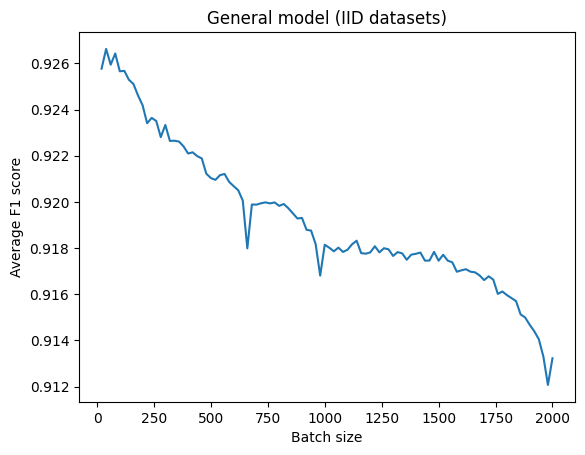

In [68]:
fig = plt.figure()


avg_general_f1_score = []

for row in range(len(g_rounds)):
    sum_f1_score = 0
    for index in range(len(model_list)):
        model_name = "model_" + str(index)
        sum_f1_score += general_f1_score[model_name][row]
    avg_general_f1_score.append(sum_f1_score/NUM_CLIENTS)    

plt.plot(g_rounds, avg_general_f1_score)



# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Batch size")
plt.ylabel("Average F1 score")
plt.title("General model (IID datasets)")
  
# # Adding legend, which helps us recognize the curve according to it's color
# plt.legend(loc='best')
  
# # To load the display window
# plt.show()


# saving the figure
fig_name = "IID/plots/IID_general_avg_general_f1_score_vs_batch_size_" + str(current_date) + ".png"

fig.patch.set_facecolor('xkcd:white')
fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

In [69]:
## For combine plots
IID_general_f1_score = copy.deepcopy(avg_general_f1_score)

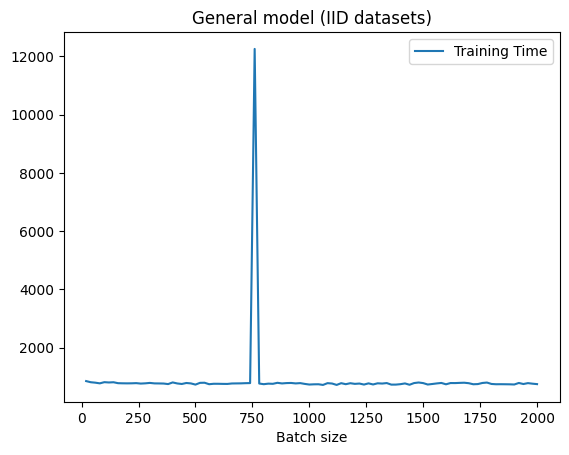

In [87]:
general_time_fig = general_result.plot(x='Batch size', y='Training Time', title='General model (IID datasets)').get_figure()

# saving the figure
fig_name = "IID/plots/IID_General_training_time_vs_batch_size_" + str(current_date) + ".png"

general_time_fig.patch.set_facecolor('xkcd:white')
general_time_fig.savefig(fig_name,dpi = 150, bbox_inches="tight")

In [ ]:
g_comm = {}

for index in range(len(model_list)):
    model_name = "model_" + str(index)
    g_comm[model_name] = list()
    for row in range(len(general_result)):
        g_comm[model_name].append(general_result['Number of communications'][row][model_name])

In [ ]:
# for index in range(len(model_list)):
#     model_name = "model_" + str(index)
#     print(g_comm[model_name][-1])

In [ ]:
# # loss_plt = {}

# fig = plt.figure()

# for index in range(len(model_list)):
#     model_name = "model_" + str(index)
#     plt.plot(g_rounds, g_comm[model_name], label=model_name)


# # Naming the x-axis, y-axis and the whole graph
# plt.xlabel("Batch size")
# plt.ylabel("Number of communications")
# plt.title("General model (IID datasets)")
  
# # Adding legend, which helps us recognize the curve according to it's color
# plt.legend(loc='best')
  
# # To load the display window
# plt.show()


# # saving the figure
# fig_name = "IID/plots/IID_General_communication_cost_vs_batch_size_" + str(current_date) + ".png"


# fig.patch.set_facecolor('xkcd:white')
# fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

In [ ]:
fig = plt.figure()

# for index in range(len(model_list)):
#     model_name = "model_" + str(index)
#     plt.plot(g_rounds, g_comm[model_name], label=model_name)

    
avg_communications = []

for row in range(len(g_rounds)):
    sum_communications = 0
    for index in range(len(model_list)):
        model_name = "model_" + str(index)
        sum_communications += g_comm[model_name][row]
    avg_communications.append(sum_communications/NUM_CLIENTS)    

plt.plot(g_rounds, avg_communications)


# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Batch size")
plt.ylabel("Average number of communications")
plt.title("General model (IID datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
# plt.legend(loc='best')
  
# To load the display window
plt.show()


# saving the figure
fig_name = "IID/plots/IID_General_avg_communication_cost_vs_batch_size_" + str(current_date) + ".png"


fig.patch.set_facecolor('xkcd:white')
fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

In [ ]:
# avg_communications

# Centralized

In [70]:
acc_file = open("IID/IID_Centralized_13112022_batches.pkl", "rb")
centralized_result = pickle.load(acc_file)
acc_file.close()

In [71]:
centralized_result

,Traing data,Test data,Number of Clients,Batch size,Number of epochs,Number of rounds,anomaly_percentage,cluster_anomaly_percentage,random_anomaly_dic,Precision,Recall,F1_score,Accuracy,Training Time,Number of communications
0,200000,10000,100,20,10,50,0.6,"{'cluster_0': 0.6, 'cluster_1': 0.6, 'cluster_...","{'client_0': 0.5845, 'client_1': 0.5755, 'clie...",0.926115,0.938000,0.932020,0.9179,800.979473,"{'model_0': 81100, 'model_1': 81100, 'model_2'..."
1,200000,10000,100,40,10,50,0.6,"{'cluster_0': 0.6, 'cluster_1': 0.6, 'cluster_...","{'client_0': 0.5845, 'client_1': 0.5755, 'clie...",0.904558,0.949333,0.926405,0.9095,747.922791,"{'model_0': 81100, 'model_1': 81100, 'model_2'..."
2,200000,10000,100,60,10,50,0.6,"{'cluster_0': 0.6, 'cluster_1': 0.6, 'cluster_...","{'client_0': 0.5845, 'client_1': 0.5755, 'clie...",0.904073,0.947167,0.925118,0.9080,724.351387,"{'model_0': 81100, 'model_1': 81100, 'model_2'..."
3,200000,10000,100,80,10,50,0.6,"{'cluster_0': 0.6, 'cluster_1': 0.6, 'cluster_...","{'client_0': 0.5845, 'client_1': 0.5755, 'clie...",0.902188,0.948500,0.924764,0.9074,713.584914,"{'model_0': 81100, 'model_1': 81100, 'model_2'..."
4,200000,10000,100,100,10,50,0.6,"{'cluster_0': 0.6, 'cluster_1': 0.6, 'cluster_...","{'client_0': 0.5845, 'client_1': 0.5755, 'clie...",0.926821,0.939333,0.933035,0.9191,721.471782,"{'model_0': 81100, 'model_1': 81100, 'model_2'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,200000,10000,100,1920,10,50,0.6,"{'cluster_0': 0.6, 'cluster_1': 0.6, 'cluster_...","{'client_0': 0.5845, 'client_1': 0.5755, 'clie...",0.845038,0.990667,0.912076,0.8854,682.127671,"{'model_0': 81100, 'model_1': 81100, 'model_2'..."
96,200000,10000,100,1940,10,50,0.6,"{'cluster_0': 0.6, 'cluster_1': 0.6, 'cluster_...","{'client_0': 0.5845, 'client_1': 0.5755, 'clie...",0.844742,0.989333,0.911338,0.8845,676.776405,"{'model_0': 81100, 'model_1': 81100, 'model_2'..."
97,200000,10000,100,1960,10,50,0.6,"{'cluster_0': 0.6, 'cluster_1': 0.6, 'cluster_...","{'client_0': 0.5845, 'client_1': 0.5755, 'clie...",0.838443,0.998167,0.911360,0.8835,691.979662,"{'model_0': 81100, 'model_1': 81100, 'model_2'..."
98,200000,10000,100,1980,10,50,0.6,"{'cluster_0': 0.6, 'cluster_1': 0.6, 'cluster_...","{'client_0': 0.5845, 'client_1': 0.5755, 'clie...",0.837997,0.998333,0.911165,0.8832,686.818681,"{'model_0': 81100, 'model_1': 81100, 'model_2'..."


In [72]:
m_rounds = np.array(centralized_result['Batch size']).tolist()
# print(m_rounds)

In [73]:
## For combine plots
IID_centralized_accuracy = np.array(centralized_result['Accuracy']).tolist()

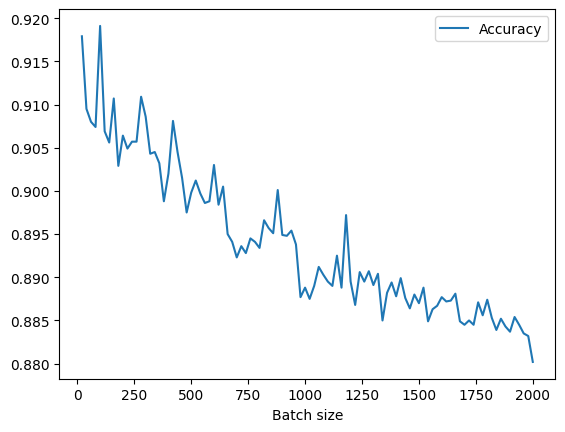

In [89]:
centralized_accuracy_fig = centralized_result.plot(x='Batch size', y='Accuracy', title='Centralized FL model (IID datasets)').get_figure()

# acc_fig.set(xlabel='Batch size', ylabel='Accuracy')

# saving the figure
fig_name = "IID/plots/IID_Centralized_accuracy_vs_batch_size_" + str(current_date) + ".png"



# acc_fig.ylabel("Accuracy")
# acc_fig.title("Accuracy of the Model")

centralized_accuracy_fig.patch.set_facecolor('xkcd:white')
centralized_accuracy_fig.savefig(fig_name,dpi = 150, bbox_inches="tight")

In [ ]:
centralized_precision_fig = centralized_result.plot(x='Batch size', y='Precision', title='Centralized FL model (IID datasets)').get_figure()


# saving the figure
fig_name = "IID/plots/IID_Centralized_precision_vs_batch_size_" + str(current_date) + ".png"


centralized_precision_fig.patch.set_facecolor('xkcd:white')
centralized_precision_fig.savefig(fig_name,dpi = 150, bbox_inches="tight")

In [ ]:
centralized_recall_fig = centralized_result.plot(x='Batch size', y='Recall', title='Centralized FL model (IID datasets)').get_figure()



# saving the figure
fig_name = "IID/plots/IID_Centralized_recall_vs_batch_size_" + str(current_date) + ".png"



centralized_recall_fig.patch.set_facecolor('xkcd:white')
centralized_recall_fig.savefig(fig_name,dpi = 150, bbox_inches="tight")

In [ ]:
# centralized_f1_fig = centralized_result.plot(x='Batch size', y="F1 score", title='Centralized FL model (IID datasets)').get_figure()

# # saving the figure
# fig_name = "IID/plots/Centralized_f1_score_vs_batch_size_" + str(current_date) + ".png"



# centralized_f1_fig.patch.set_facecolor('xkcd:white')
# centralized_f1_fig.savefig(fig_name,dpi = 150, bbox_inches="tight")

In [75]:
centralized_f1_score = centralized_result.iloc[:,11].to_list()

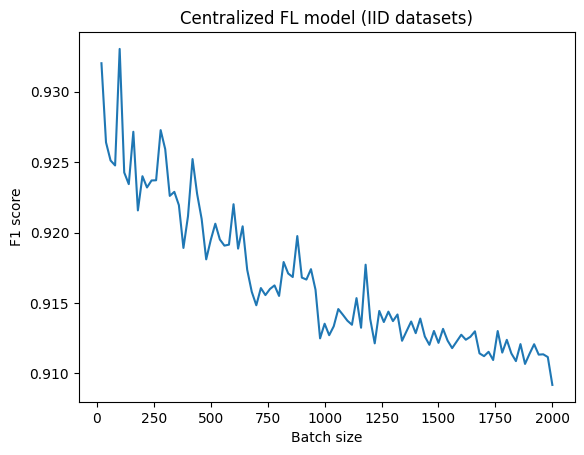

In [76]:
fig = plt.figure()
plt.plot(m_rounds, centralized_f1_score)

# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Batch size")
plt.ylabel("F1 score")
plt.title("Centralized FL model (IID datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
# plt.legend(loc='best')
  
# To load the display window
plt.show()

# saving the figure
fig_name = "IID/plots/IID_Centralized_f1_score_vs_batch_size_" + str(current_date) + ".png"

fig.patch.set_facecolor('xkcd:white')
fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

In [77]:
## For combine plots
IID_centralized_f1_score = copy.deepcopy(centralized_f1_score)

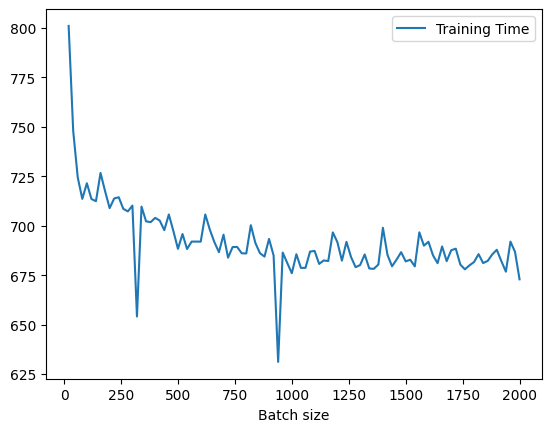

In [91]:
centralized_time_fig = centralized_result.plot(x='Batch size', y='Training Time', title='Centralized FL model (IID datasets)').get_figure()

# saving the figure
fig_name = "IID/plots/IID_Centralized_training_time_vs_batch_size_" + str(current_date) + ".png"

centralized_time_fig.patch.set_facecolor('xkcd:white')
centralized_time_fig.savefig(fig_name,dpi = 150, bbox_inches="tight")

In [ ]:
# centralized_result['Number of communications']

In [ ]:
cent_comm = {}



for index in range(len(centralized_model_list)):
    model_name = centralized_model_list[index]
    cent_comm[model_name] = list()
    for row in range(len(centralized_result)):
        cent_comm[model_name].append(centralized_result['Number of communications'][row][model_name])
    

In [ ]:
# for index in range(len(model_list)):
#     model_name = "model_" + str(index)
#     print(cent_comm[model_name][-1])

In [ ]:
# #### loss_plt = {}

# fig = plt.figure()

# for index in range(len(model_list)):
#     model_name = "model_" + str(index)
#     plt.plot(m_rounds, cent_comm[model_name], label=model_name)


# # Naming the x-axis, y-axis and the whole graph
# plt.xlabel("Batch size")
# plt.ylabel("Number of communications")
# plt.title("Centralized FL model (IID datasets)")
  
# # Adding legend, which helps us recognize the curve according to it's color
# plt.legend(loc='best')
  
# # To load the display window
# plt.show()


# # saving the figure
# fig_name = "IID/plots/IID_Centralized_communication_cost_vs_batch_size_" + str(current_date) + ".png"

# fig.patch.set_facecolor('xkcd:white')
# fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

In [ ]:

fig = plt.figure()

# for index in range(len(model_list)):
#     model_name = "model_" + str(index)
#     plt.plot(m_rounds, cent_comm[model_name], label=model_name)


avg_communications = []

for row in range(len(m_rounds)):
    sum_communications = 0
    for index in range(len(centralized_model_list)):
        model_name = centralized_model_list[index]
        sum_communications += cent_comm[model_name][row]
    avg_communications.append(sum_communications/NUM_CLIENTS)    

plt.plot(m_rounds, avg_communications)


# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Batch size")
plt.ylabel("Average number of communications")
plt.title("Centralized FL model (IID datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
# plt.legend(loc='best')
  
# To load the display window
plt.show()


# saving the figure
fig_name = "IID/plots/IID_Centralized_avg_communication_cost_vs_batch_size_" + str(current_date) + ".png"

fig.patch.set_facecolor('xkcd:white')
fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

In [ ]:
# avg_communications

# Homomorphic encryption

In [ ]:
acc_file = open("IID/IID_Homomorphic_13112022_batches.pkl", "rb")
homomorphic_result = pickle.load(acc_file)
acc_file.close()

In [ ]:
homomorphic_result

In [ ]:
# homomorphic_result['Number of communications'][0]

In [ ]:
e_rounds = np.array(homomorphic_result['Batch size']).tolist()
# print(e_rounds)

In [ ]:
## For combine plotting
IID_homomorphic_accuracy = np.array(homomorphic_result['Accuracy']).tolist()

In [ ]:
homomorphic_accuracy_fig = homomorphic_result.plot(x='Batch size', y='Accuracy', title='P2P Homomorphic model (IID datasets)').get_figure()

# acc_fig.set(xlabel='Batch size', ylabel='Accuracy')

# saving the figure
fig_name = "IID/plots/IID_Homomorphic_accuracy_vs_batch_size_" + str(current_date) + ".png"



# acc_fig.ylabel("Accuracy")
# acc_fig.title("Accuracy of the Model")

homomorphic_accuracy_fig.patch.set_facecolor('xkcd:white')
homomorphic_accuracy_fig.savefig(fig_name,dpi = 150, bbox_inches="tight")

In [ ]:
homomorphic_precision_fig = homomorphic_result.plot(x='Batch size', y='Precision', title='P2P Homomorphic model (IID datasets)').get_figure()


# saving the figure
fig_name = "IID/plots/IID_Homomorphic_precision_vs_batch_size_" + str(current_date) + ".png"


homomorphic_precision_fig.patch.set_facecolor('xkcd:white')
homomorphic_precision_fig.savefig(fig_name,dpi = 150, bbox_inches="tight")

In [ ]:
homomorphic_recall_fig = homomorphic_result.plot(x='Batch size', y='Recall', title='P2P Homomorphic model (IID datasets)').get_figure()



# saving the figure
fig_name = "IID/plots/IID_Homomorphic_recall_vs_batch_size_" + str(current_date) + ".png"



homomorphic_recall_fig.patch.set_facecolor('xkcd:white')
homomorphic_recall_fig.savefig(fig_name,dpi = 150, bbox_inches="tight")

In [ ]:
# homomorphic_f1_fig = homomorphic_result.plot(x='Batch size', y="F1 score", title='P2P Homomorphic model (IID datasets)').get_figure()

# # saving the figure
# fig_name = "IID/plots/Homomorphic_f1_score_vs_batch_size_" + str(current_date) + ".png"



# homomorphic_f1_fig.patch.set_facecolor('xkcd:white')
# homomorphic_f1_fig.savefig(fig_name,dpi = 150, bbox_inches="tight")

In [ ]:
# homomorphic_result.iloc[:,11]

In [ ]:
homomorphic_f1_score = homomorphic_result.iloc[:,11].to_list()

In [ ]:
fig = plt.figure()
plt.plot(e_rounds, homomorphic_f1_score)

# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Batch size")
plt.ylabel("F1 score")
plt.title("P2P Homomorphic model (IID datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
# plt.legend(loc='best')
  
# To load the display window
plt.show()

# saving the figure
fig_name = "IID/plots/IID_Homomorphic_f1_score_vs_batch_size_" + str(current_date) + ".png"

fig.patch.set_facecolor('xkcd:white')
fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

In [ ]:
## For combine plotting
IID_homomorphic_f1_score = copy.deepcopy(homomorphic_f1_score)

In [ ]:
homomorphic_time_fig = homomorphic_result.plot(x='Batch size', y='Training Time', title='P2P Homomorphic model (IID datasets)').get_figure()

# saving the figure
fig_name = "IID/plots/IID_Homomorphic_training_time_vs_batch_size_" + str(current_date) + ".png"

homomorphic_time_fig.patch.set_facecolor('xkcd:white')
homomorphic_time_fig.savefig(fig_name,dpi = 150, bbox_inches="tight")

In [ ]:
# homomorphic_result['Number of communications']

In [ ]:
e_comm = {}



for index in range(len(model_list)):
    model_name = "model_" + str(index)
    e_comm[model_name] = list()
    for row in range(len(homomorphic_result)):
        e_comm[model_name].append(homomorphic_result['Number of communications'][row][model_name])
    

In [ ]:
# #### loss_plt = {}

# fig = plt.figure()

# for index in range(len(model_list)):
#     model_name = "model_" + str(index)
#     plt.plot(e_rounds, e_comm[model_name], label=model_name)


# # Naming the x-axis, y-axis and the whole graph
# plt.xlabel("Batch size")
# plt.ylabel("Number of communications")
# plt.title("P2P Homomorphic model (IID datasets)")
  
# # Adding legend, which helps us recognize the curve according to it's color
# # plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),ncol=10)

  
# # To load the display window
# plt.show()


# # saving the figure
# fig_name = "IID/plots/IID_Homomorphic_communication_cost_vs_batch_size_" + str(current_date) + ".png"

# fig.patch.set_facecolor('xkcd:white')
# fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

In [ ]:

fig = plt.figure()

# for index in range(len(model_list)):
#     model_name = "model_" + str(index)
#     plt.plot(e_rounds, e_comm[model_name], label=model_name)

avg_communications = []

for row in range(len(e_rounds)):
    sum_communications = 0
    for index in range(len(model_list)):
        model_name = "model_" + str(index)
        sum_communications += e_comm[model_name][row]
    avg_communications.append(sum_communications/NUM_CLIENTS)    

plt.plot(e_rounds, avg_communications)




# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Batch size")
plt.ylabel("Average number of communications")
plt.title("P2P Homomorphic model (IID datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
# plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),ncol=10)

  
# To load the display window
plt.show()


# saving the figure
fig_name = "IID/plots/IID_Homomorphic_avg_communication_cost_vs_batch_size_" + str(current_date) + ".png"

fig.patch.set_facecolor('xkcd:white')
fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

In [ ]:
# avg_communications

# Non-IID datasets

# TargentEnc

In [ ]:
acc_file = open("non_IID/non_IID_TargetEnc_13112022_batches.pkl", "rb")
target_result = pickle.load(acc_file)
acc_file.close()

In [ ]:
target_result

In [ ]:
t_rounds = np.array(target_result['Batch size']).tolist()
# print(t_rounds)

In [ ]:
## For combine plotting
non_IID_target_accuracy = np.array(target_result['Accuracy']).tolist()

In [ ]:
target_accuracy_fig = target_result.plot(x='Batch size', y='Accuracy', title='P2P Normal model (Non-IID datasets)').get_figure()

# acc_fig.set(xlabel='Batch size', ylabel='Accuracy')

# saving the figure
fig_name = "non_IID/plots/non_IID_TargetEnc_accuracy_vs_batch_size_" + str(current_date) + ".png"



# acc_fig.ylabel("Accuracy")
# acc_fig.title("Accuracy of the Model")

target_accuracy_fig.patch.set_facecolor('xkcd:white')
target_accuracy_fig.savefig(fig_name,dpi = 150, bbox_inches="tight")

In [ ]:
target_precision_fig = target_result.plot(x='Batch size', y='Precision', title='P2P Normal model (Non-IID datasets)').get_figure()


# saving the figure
fig_name = "non_IID/plots/non_IID_TargetEnc_precision_vs_batch_size_" + str(current_date) + ".png"


target_precision_fig.patch.set_facecolor('xkcd:white')
target_precision_fig.savefig(fig_name,dpi = 150, bbox_inches="tight")

In [ ]:
target_recall_fig = target_result.plot(x='Batch size', y='Recall', title='P2P Normal model (Non-IID datasets)').get_figure()



# saving the figure
fig_name = "non_IID/plots/non_IID_TargetEnc_recall_vs_batch_size_" + str(current_date) + ".png"



target_recall_fig.patch.set_facecolor('xkcd:white')
target_recall_fig.savefig(fig_name,dpi = 150, bbox_inches="tight")

In [ ]:
# target_f1_fig = target_result.plot(x='Batch size', y="F1 score", title='P2P Normal model (Non-IID datasets)').get_figure()

# # saving the figure
# fig_name = "non_IID/plots/TargetEnc_f1_score_vs_batch_size_" + str(current_date) + ".png"



# target_f1_fig.patch.set_facecolor('xkcd:white')
# target_f1_fig.savefig(fig_name,dpi = 150, bbox_inches="tight")

In [ ]:
# target_result.iloc[:,11]

In [ ]:
target_f1_score = target_result.iloc[:,11].to_list()

In [ ]:
fig = plt.figure()
plt.plot(t_rounds, target_f1_score)

# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Batch size")
plt.ylabel("F1 score")
plt.title("P2P Normal model (Non-IID datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
# plt.legend(loc='best')
  
# To load the display window
plt.show()

# saving the figure
fig_name = "non_IID/plots/non_IID_TargetEnc_f1_score_vs_batch_size_" + str(current_date) + ".png"

fig.patch.set_facecolor('xkcd:white')
fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

In [ ]:
## For combine plotting
non_IID_target_f1_score = copy.deepcopy(target_f1_score)

In [ ]:
target_time_fig = target_result.plot(x='Batch size', y='Training Time', title='P2P Normal model (Non-IID datasets)').get_figure()

# saving the figure
fig_name = "non_IID/plots/non_IID_TargetEnc_training_time_vs_batch_size_" + str(current_date) + ".png"

target_time_fig.patch.set_facecolor('xkcd:white')
target_time_fig.savefig(fig_name,dpi = 150, bbox_inches="tight")

In [ ]:
# target_result['Number of communications']

In [ ]:
t_comm = {}



for index in range(len(model_list)):
    model_name = "model_" + str(index)
    t_comm[model_name] = list()
    for row in range(len(target_result)):
        t_comm[model_name].append(target_result['Number of communications'][row][model_name])
    

In [ ]:
# #### loss_plt = {}

# fig = plt.figure()

# for index in range(len(model_list)):
#     model_name = "model_" + str(index)
#     plt.plot(t_rounds, t_comm[model_name], label=model_name)


# # Naming the x-axis, y-axis and the whole graph
# plt.xlabel("Batch size")
# plt.ylabel("Number of communications")
# plt.title("P2P Normal model (Non-IID datasets)")
  
# # Adding legend, which helps us recognize the curve according to it's color
# plt.legend(loc='best')
  
# # To load the display window
# plt.show()


# # saving the figure
# fig_name = "non_IID/plots/non_IID_TargetEnc_communication_cost_vs_batch_size_" + str(current_date) + ".png"

# fig.patch.set_facecolor('xkcd:white')
# fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

In [ ]:
fig = plt.figure()

# for index in range(len(model_list)):
#     model_name = "model_" + str(index)
#     plt.plot(t_rounds, t_comm[model_name], label=model_name)

avg_communications = []

for row in range(len(t_rounds)):
    sum_communications = 0
    for index in range(len(model_list)):
        model_name = "model_" + str(index)
        sum_communications += t_comm[model_name][row]
    avg_communications.append(sum_communications/NUM_CLIENTS)    

plt.plot(t_rounds, avg_communications)




# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Batch size")
plt.ylabel("Average number of communications")
plt.title("P2P Normal model (Non-IID datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
# plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),ncol=10)

  
# To load the display window
plt.show()


# saving the figure
fig_name = "non_IID/plots/non_IID_TargetEnc_avg_communication_cost_vs_batch_size_" + str(current_date) + ".png"

fig.patch.set_facecolor('xkcd:white')
fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

# Clustered

In [ ]:
bcc_file = open("non_IID/non_IID_Clustered_13112022_batches.pkl", "rb")
clustered_result = pickle.load(bcc_file)
bcc_file.close()

In [ ]:
clustered_result

In [ ]:
c_rounds = np.array(clustered_result['Batch size']).tolist()
# print(c_rounds)

In [ ]:
clustered_accuracy = {}
for cluster in cluster_list:
    clustered_accuracy[cluster] = list()
    for index in range(len(clustered_result)):
        clustered_accuracy[cluster].append(clustered_result['Accuracy'][index][cluster])

In [ ]:
# clustered_accuracy = {}

# clustered_accuracy['cluster_0'] = list()
# clustered_accuracy['cluster_1'] = list()
# clustered_accuracy['cluster_2'] = list()

# for index in range(len(clustered_result)):
#     clustered_accuracy['cluster_0'].append(clustered_result['Accuracy'][index]['cluster_0'])
#     clustered_accuracy['cluster_1'].append(clustered_result['Accuracy'][index]['cluster_1'])
#     clustered_accuracy['cluster_2'].append(clustered_result['Accuracy'][index]['cluster_2'])

In [ ]:

fig = plt.figure()

for index in range(NUM_CLUSTERS):
    cluster_name = cluster_list[index]
    plt.plot(c_rounds, clustered_accuracy[cluster_name], label=cluster_name)


# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Batch size")
plt.ylabel("Accuracy")
plt.title("P2P Clustered model (Non-IID datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend(loc='best')
  
# To load the display window
plt.show()


# saving the figure
fig_name = "non_IID/plots/non_IID_clustered_accuracy_vs_batch_size_" + str(current_date) + ".png"

fig.patch.set_facecolor('xkcd:white')
fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

In [ ]:
clustered_result["Accuracy"][3]

In [ ]:
############ Average value ###################

In [ ]:
fig = plt.figure()

    
avg_cl_accuracy = []

for row in range(len(c_rounds)):
    sum_accuracy = 0
    for index in range(NUM_CLUSTERS):
        cluster_name = "cluster_" + str(index)
        sum_accuracy += clustered_accuracy[cluster_name][row]
    avg_cl_accuracy.append(sum_accuracy/NUM_CLUSTERS)    

plt.plot(c_rounds, avg_cl_accuracy)


# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Batch size")
plt.ylabel("Average accuracy")
plt.title("P2P Clustered model (Non-IID datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
# plt.legend(loc='best')
  
# To load the display window
plt.show()


# saving the figure
fig_name = "non_IID/plots/non_IID_clustered_avg_accuracy_vs_batch_size_" + str(current_date) + ".png"

fig.patch.set_facecolor('xkcd:white')
fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

In [ ]:
## For combine plotting
non_IID_clustered_accuracy = copy.deepcopy(avg_cl_accuracy)

In [ ]:
clustered_precision = {}
for cluster in cluster_list:
    clustered_precision[cluster] = list()
    for index in range(len(clustered_result)):
        clustered_precision[cluster].append(clustered_result['Precision'][index][cluster])

In [ ]:
# clustered_precision = {}

# clustered_precision['cluster_0'] = list()
# clustered_precision['cluster_1'] = list()
# clustered_precision['cluster_2'] = list()

# for index in range(len(clustered_result)):
#     clustered_precision['cluster_0'].append(clustered_result['Precision'][index]['cluster_0'])
#     clustered_precision['cluster_1'].append(clustered_result['Precision'][index]['cluster_1'])
#     clustered_precision['cluster_2'].append(clustered_result['Precision'][index]['cluster_2'])

In [ ]:
fig = plt.figure()

for index in range(NUM_CLUSTERS):
    cluster_name = cluster_list[index]
    plt.plot(c_rounds, clustered_precision[cluster_name], label=cluster_name)


# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Batch size")
plt.ylabel("Precision")
plt.title("P2P Clustered model (Non-IID datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend(loc='best')
  
# To load the display window
plt.show()


# saving the figure
fig_name = "non_IID/plots/non_IID_clustered_precision_vs_batch_size_" + str(current_date) + ".png"

fig.patch.set_facecolor('xkcd:white')
fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

In [ ]:
clustered_recall = {}
for cluster in cluster_list:
    clustered_recall[cluster] = list()
    for index in range(len(clustered_result)):
        clustered_recall[cluster].append(clustered_result['Recall'][index][cluster])

In [ ]:
# clustered_recall = {}

# clustered_recall['cluster_0'] = list()
# clustered_recall['cluster_1'] = list()
# clustered_recall['cluster_2'] = list()

# for index in range(len(clustered_result)):
#     clustered_recall['cluster_0'].append(clustered_result['Recall'][index]['cluster_0'])
#     clustered_recall['cluster_1'].append(clustered_result['Recall'][index]['cluster_1'])
#     clustered_recall['cluster_2'].append(clustered_result['Recall'][index]['cluster_2'])

In [ ]:
fig = plt.figure()

for index in range(NUM_CLUSTERS):
    cluster_name = cluster_list[index]
    plt.plot(c_rounds, clustered_recall[cluster_name], label=cluster_name)


# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Batch size")
plt.ylabel("Recall")
plt.title("P2P Clustered model (Non-IID datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend(loc='best')
  
# To load the display window
plt.show()


# saving the figure
fig_name = "non_IID/plots/non_IID_clustered_recall_vs_batch_size_" + str(current_date) + ".png"

fig.patch.set_facecolor('xkcd:white')
fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

In [ ]:
# clustered_f1_score = {}

# clustered_f1_score['cluster_0'] = list()
# clustered_f1_score['cluster_1'] = list()
# clustered_f1_score['cluster_2'] = list()

# for index in range(len(clustered_result)):
#     clustered_f1_score['cluster_0'].append(clustered_result['F1 score'][index]['cluster_0'])
#     clustered_f1_score['cluster_1'].append(clustered_result['F1 score'][index]['cluster_1'])
#     clustered_f1_score['cluster_2'].append(clustered_result['F1 score'][index]['cluster_2'])

In [ ]:
# fig = plt.figure()

# for index in range(NUM_CLUSTERS):
#     cluster_name = cluster_list[index]
#     plt.plot(c_rounds, clustered_f1_score[cluster_name], label=cluster_name)


# # Naming the x-axis, y-axis and the whole graph
# plt.xlabel("Batch size")
# plt.ylabel("F1 score")
# plt.title("P2P Clustered model (Non-IID datasets)")
  
# # Adding legend, which helps us recognize the curve according to it's color
# plt.legend(loc='best')
  
# # To load the display window
# plt.show()


# # saving the figure
# fig_name = "non_IID/plots/non_IID_clustered_f1_score_vs_batch_size_" + str(current_date) + ".png"

# fig.patch.set_facecolor('xkcd:white')
# fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

In [ ]:
clustered_f1_list = clustered_result.iloc[:,11].to_list()

In [ ]:
clustered_f1_score = {}
for cluster in cluster_list:
    clustered_f1_score[cluster] = list()
    for index in range(len(clustered_result)):
        clustered_f1_score[cluster].append(clustered_f1_list[index][cluster])

In [ ]:
# clustered_f1_score = {}

# clustered_f1_score['cluster_0'] = list()
# clustered_f1_score['cluster_1'] = list()
# clustered_f1_score['cluster_2'] = list()

# for index in range(len(clustered_result)):
#     clustered_f1_score['cluster_0'].append(clustered_f1_list[index]['cluster_0'])
#     clustered_f1_score['cluster_1'].append(clustered_f1_list[index]['cluster_1'])
#     clustered_f1_score['cluster_2'].append(clustered_f1_list[index]['cluster_2'])

In [ ]:
fig = plt.figure()

for index in range(NUM_CLUSTERS):
    cluster_name = cluster_list[index]
    plt.plot(c_rounds, clustered_f1_score[cluster_name], label=cluster_name)


# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Batch size")
plt.ylabel("F1 score")
plt.title("P2P Clustered model (Non-IID datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend(loc='best')
  
# To load the display window
plt.show()


# saving the figure
fig_name = "non_IID/plots/non_IID_clustered_f1_score_vs_batch_size_" + str(current_date) + ".png"

fig.patch.set_facecolor('xkcd:white')
fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

In [ ]:
############ Average value ###################

In [ ]:
fig = plt.figure()


    
avg_cl_f1_score = []

for row in range(len(c_rounds)):
    sum_f1_score = 0
    for index in range(NUM_CLUSTERS):
        cluster_name = "cluster_" + str(index)
        sum_f1_score += clustered_f1_score[cluster_name][row]
    avg_cl_f1_score.append(sum_f1_score/NUM_CLUSTERS)    

plt.plot(c_rounds, avg_cl_f1_score)


# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Batch size")
plt.ylabel("Average F1 score")
plt.title("P2P Clustered model (Non-IID datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
# plt.legend(loc='best')
  
# To load the display window
plt.show()


# saving the figure
fig_name = "non_IID/plots/non_IID_clustered_avg_f1_score_vs_batch_size_" + str(current_date) + ".png"

fig.patch.set_facecolor('xkcd:white')
fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

In [ ]:
### For combine plotting
non_IID_clustered_f1_score = copy.deepcopy(avg_cl_f1_score)

In [ ]:
clustered_time_fig = clustered_result.plot(x='Batch size', y='Training Time', title='P2P Clustered model (Non-IID datasets)').get_figure()

# saving the figure
fig_name = "non_IID/plots/non_IID_Clustered_training_time_vs_batch_size_" + str(current_date) + ".png"

clustered_time_fig.patch.set_facecolor('xkcd:white')
clustered_time_fig.savefig(fig_name,dpi = 150, bbox_inches="tight")

In [ ]:
c_comm = {}

for index in range(len(model_list)):
    model_name = "model_" + str(index)
    c_comm[model_name] = list()
    for row in range(len(clustered_result)):
        c_comm[model_name].append(clustered_result['Number of communications'][row][model_name])

In [ ]:
# c_comm

In [ ]:

# fig = plt.figure()

# for index in range(len(model_list)):
#     model_name = "model_" + str(index)
#     plt.plot(c_rounds, c_comm[model_name], label=model_name)


# # Naming the x-axis, y-axis and the whole graph
# plt.xlabel("Batch size")
# plt.ylabel("Number of communications")
# plt.title("P2P Clustered model (Non-IID datasets)")
  
# # Adding legend, which helps us recognize the curve according to it's color
# plt.legend(loc='best')
  
# # To load the display window
# plt.show()


# # saving the figure
# fig_name = "non_IID/plots/non_IID_Clustered_communication_cost_vs_batch_size_" + str(current_date) + ".png"

# fig.patch.set_facecolor('xkcd:white')
# fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

In [ ]:
fig = plt.figure()

# for index in range(len(model_list)):
#     model_name = "model_" + str(index)
#     plt.plot(c_rounds, c_comm[model_name], label=model_name)


avg_communications = []

for row in range(len(c_rounds)):
    sum_communications = 0
    for index in range(len(model_list)):
        model_name = "model_" + str(index)
        sum_communications += c_comm[model_name][row]
    avg_communications.append(sum_communications/NUM_CLIENTS)    

plt.plot(c_rounds, avg_communications)



# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Batch size")
plt.ylabel("Average number of communications")
plt.title("P2P Clustered model (Non-IID datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
# plt.legend(loc='best')
  
# To load the display window
plt.show()


# saving the figure
fig_name = "non_IID/plots/non_IID_Clustered_avg_communication_cost_vs_batch_size_" + str(current_date) + ".png"

fig.patch.set_facecolor('xkcd:white')
fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

In [ ]:
# avg_communications

# Hierarchical

In [ ]:
ccc_file = open("non_IID/non_IID_Hierarchical_13112022_batches.pkl", "rb")
hierarchical_result = pickle.load(ccc_file)
ccc_file.close()

In [ ]:
# hierarchical_result = hierarchical_result.drop(labels=[0,1,2], axis=0)
# hierarchical_result = hierarchical_result.reset_index(drop=True)

In [ ]:
# hierarchical_result = hierarchical_result.drop([0,1])

In [ ]:
hierarchical_result

In [ ]:
h_rounds = np.array(hierarchical_result['Batch size']).tolist()
# print(h_rounds)

In [ ]:
hierarchical_accuracy = {}
for cluster in cluster_list:
    hierarchical_accuracy[cluster] = list()
    for index in range(len(hierarchical_result)):
        hierarchical_accuracy[cluster].append(hierarchical_result['Accuracy'][index][cluster])

In [ ]:
# hierarchical_accuracy = {}

# hierarchical_accuracy['cluster_0'] = list()
# hierarchical_accuracy['cluster_1'] = list()
# hierarchical_accuracy['cluster_2'] = list()

# for index in range(len(hierarchical_result)):
#     hierarchical_accuracy['cluster_0'].append(hierarchical_result['Accuracy'][index]['cluster_0'])
#     hierarchical_accuracy['cluster_1'].append(hierarchical_result['Accuracy'][index]['cluster_1'])
#     hierarchical_accuracy['cluster_2'].append(hierarchical_result['Accuracy'][index]['cluster_2'])

In [ ]:

fig = plt.figure()

for index in range(NUM_CLUSTERS):
    cluster_name = cluster_list[index]
    plt.plot(h_rounds, hierarchical_accuracy[cluster_name], label=cluster_name)


# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Batch size")
plt.ylabel("Accuracy")
plt.title("P2P Hierarchical model (Non-IID datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend(loc='best')
  
# To load the display window
plt.show()


# saving the figure
fig_name = "non_IID/plots/non_IID_hierarchical_accuracy_vs_batch_size_" + str(current_date) + ".png"

fig.patch.set_facecolor('xkcd:white')
fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

In [ ]:
hierarchical_result["Accuracy"][3]

In [ ]:
#### Average #####

In [ ]:
fig = plt.figure()

   
avg_hier_accuracy = []

for row in range(len(h_rounds)):
    sum_accuracy = 0
    for index in range(NUM_CLUSTERS):
        cluster_name = "cluster_" + str(index)
        sum_accuracy += hierarchical_accuracy[cluster_name][row]
    avg_hier_accuracy.append(sum_accuracy/NUM_CLUSTERS)    

plt.plot(h_rounds, avg_hier_accuracy)


# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Batch size")
plt.ylabel("Average accuracy")
plt.title("P2P Hierarchical model (Non-IID datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
# plt.legend(loc='best')
  
# To load the display window
plt.show()


# saving the figure
fig_name = "non_IID/plots/non_IID_Hierarchical_avg_accuracy_vs_batch_size_" + str(current_date) + ".png"

fig.patch.set_facecolor('xkcd:white')
fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

In [ ]:
### For combine plotting
non_IID_hierarchical_accuracy = copy.deepcopy(avg_hier_accuracy)

In [ ]:
hierarchical_precision = {}
for cluster in cluster_list:
    hierarchical_precision[cluster] = list()
    for index in range(len(hierarchical_result)):
        hierarchical_precision[cluster].append(hierarchical_result['Precision'][index][cluster])

In [ ]:
# hierarchical_precision = {}

# hierarchical_precision['cluster_0'] = list()
# hierarchical_precision['cluster_1'] = list()
# hierarchical_precision['cluster_2'] = list()

# for index in range(len(hierarchical_result)):
#     hierarchical_precision['cluster_0'].append(hierarchical_result['Precision'][index]['cluster_0'])
#     hierarchical_precision['cluster_1'].append(hierarchical_result['Precision'][index]['cluster_1'])
#     hierarchical_precision['cluster_2'].append(hierarchical_result['Precision'][index]['cluster_2'])

In [ ]:

fig = plt.figure()

for index in range(NUM_CLUSTERS):
    cluster_name = cluster_list[index]
    plt.plot(h_rounds, hierarchical_precision[cluster_name], label=cluster_name)


# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Batch size")
plt.ylabel("Precision")
plt.title("P2P Hierarchical model (Non-IID datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend(loc='best')
  
# To load the display window
plt.show()


# saving the figure
fig_name = "non_IID/plots/non_IID_hierarchical_precision_vs_batch_size_" + str(current_date) + ".png"

fig.patch.set_facecolor('xkcd:white')
fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

In [ ]:
hierarchical_recall = {}
for cluster in cluster_list:
    hierarchical_recall[cluster] = list()
    for index in range(len(hierarchical_result)):
        hierarchical_recall[cluster].append(hierarchical_result['Recall'][index][cluster])

In [ ]:
# hierarchical_recall = {}

# hierarchical_recall['cluster_0'] = list()
# hierarchical_recall['cluster_1'] = list()
# hierarchical_recall['cluster_2'] = list()

# for index in range(len(hierarchical_result)):
#     hierarchical_recall['cluster_0'].append(hierarchical_result['Recall'][index]['cluster_0'])
#     hierarchical_recall['cluster_1'].append(hierarchical_result['Recall'][index]['cluster_1'])
#     hierarchical_recall['cluster_2'].append(hierarchical_result['Recall'][index]['cluster_2'])

In [ ]:

fig = plt.figure()

for index in range(NUM_CLUSTERS):
    cluster_name = cluster_list[index]
    plt.plot(h_rounds, hierarchical_recall[cluster_name], label=cluster_name)


# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Batch size")
plt.ylabel("Recall")
plt.title("P2P Hierarchical model (Non-IID datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend(loc='best')
  
# To load the display window
plt.show()


# saving the figure
fig_name = "non_IID/plots/non_IID_hierarchical_recall_vs_batch_size_" + str(current_date) + ".png"

fig.patch.set_facecolor('xkcd:white')
fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

In [ ]:
# hierarchical_f1_score = {}

# hierarchical_f1_score['cluster_0'] = list()
# hierarchical_f1_score['cluster_1'] = list()
# hierarchical_f1_score['cluster_2'] = list()

# for index in range(len(hierarchical_result)):
#     hierarchical_f1_score['cluster_0'].append(hierarchical_result['F1 score'][index]['cluster_0'])
#     hierarchical_f1_score['cluster_1'].append(hierarchical_result['F1 score'][index]['cluster_1'])
#     hierarchical_f1_score['cluster_2'].append(hierarchical_result['F1 score'][index]['cluster_2'])

In [ ]:

# fig = plt.figure()

# for index in range(NUM_CLUSTERS):
#     cluster_name = cluster_list[index]
#     plt.plot(h_rounds, hierarchical_f1_score[cluster_name], label=cluster_name)


# # Naming the x-axis, y-axis and the whole graph
# plt.xlabel("Batch size")
# plt.ylabel("F1 score")
# plt.title("P2P Hierarchical model (Non-IID datasets)")
  
# # Adding legend, which helps us recognize the curve according to it's color
# plt.legend(loc='best')
  
# # To load the display window
# plt.show()


# # saving the figure
# fig_name = "non_IID/plots/non_IID_hierarchical_f1_score_vs_batch_size_" + str(current_date) + ".png"

# fig.patch.set_facecolor('xkcd:white')
# fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

In [ ]:
hierarchical_f1_list = hierarchical_result.iloc[:,11].to_list()

In [ ]:
hierarchical_f1_score = {}
for cluster in cluster_list:
    hierarchical_f1_score[cluster] = list()
    for index in range(len(hierarchical_result)):
        hierarchical_f1_score[cluster].append(hierarchical_f1_list[index][cluster])

In [ ]:
# hierarchical_f1_score = {}

# hierarchical_f1_score['cluster_0'] = list()
# hierarchical_f1_score['cluster_1'] = list()
# hierarchical_f1_score['cluster_2'] = list()

# for index in range(len(hierarchical_result)):
#     hierarchical_f1_score['cluster_0'].append(hierarchical_f1_list[index]['cluster_0'])
#     hierarchical_f1_score['cluster_1'].append(hierarchical_f1_list[index]['cluster_1'])
#     hierarchical_f1_score['cluster_2'].append(hierarchical_f1_list[index]['cluster_2'])

In [ ]:
fig = plt.figure()

for index in range(NUM_CLUSTERS):
    cluster_name = cluster_list[index]
    plt.plot(h_rounds, hierarchical_f1_score[cluster_name], label=cluster_name)


# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Batch size")
plt.ylabel("F1 score")
plt.title("P2P Hierarchical model (Non-IID datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend(loc='best')
  
# To load the display window
plt.show()


# saving the figure
fig_name = "non_IID/plots/non_IID_hierarchical_f1_score_vs_batch_size_" + str(current_date) + ".png"

fig.patch.set_facecolor('xkcd:white')
fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

In [ ]:
#### Average

In [ ]:
fig = plt.figure()

    
avg_hier_f1_score = []

for row in range(len(h_rounds)):
    sum_f1_score = 0
    for index in range(NUM_CLUSTERS):
        cluster_name = "cluster_" + str(index)
        sum_f1_score += hierarchical_f1_score[cluster_name][row]
    avg_hier_f1_score.append(sum_f1_score/NUM_CLUSTERS)    

plt.plot(h_rounds, avg_hier_f1_score)


# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Batch size")
plt.ylabel("Average F1 score")
plt.title("P2P Hierarchical model (Non-IID datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
# plt.legend(loc='best')
  
# To load the display window
plt.show()


# saving the figure
fig_name = "non_IID/plots/non_IID_Hierarchical_avg_f1_score_vs_batch_size_" + str(current_date) + ".png"

fig.patch.set_facecolor('xkcd:white')

fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

In [ ]:
### for combine plotting
non_IID_hierarchical_f1_score = copy.deepcopy(avg_hier_f1_score)

In [ ]:
hierarchical_time_fig = hierarchical_result.plot(x='Batch size', y='Training Time', title='P2P Hierarchical model (Non-IID datasets)').get_figure()

# saving the figure
fig_name = "non_IID/plots/non_IID_Hierarchical_training_time_vs_batch_size_" + str(current_date) + ".png"

hierarchical_time_fig.patch.set_facecolor('xkcd:white')
hierarchical_time_fig.savefig(fig_name,dpi = 150, bbox_inches="tight")

In [ ]:
h_comm = {}

for index in range(len(model_list)):
    model_name = "model_" + str(index)
    h_comm[model_name] = list()
    for row in range(len(hierarchical_result)):
        h_comm[model_name].append(hierarchical_result['Number of communications'][row][model_name])

In [ ]:
# h_comm

In [ ]:

# fig = plt.figure()

# for index in range(len(model_list)):
#     model_name = "model_" + str(index)
#     plt.plot(h_rounds, h_comm[model_name], label=model_name)


# # Naming the x-axis, y-axis and the whole graph
# plt.xlabel("Batch size")
# plt.ylabel("Number of communications")
# plt.title("P2P Hierarchical model (Non-IID datasets)")
  
# # Adding legend, which helps us recognize the curve according to it's color
# plt.legend(loc='best')
  
# # To load the display window
# plt.show()


# # saving the figure
# fig_name = "non_IID/plots/non_IID_Hierarchical_communication_cost_vs_batch_size_" + str(current_date) + ".png"

# fig.patch.set_facecolor('xkcd:white')
# fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

In [ ]:
fig = plt.figure()

# for index in range(len(model_list)):
#     model_name = "model_" + str(index)
#     plt.plot(h_rounds, h_comm[model_name], label=model_name)

    
avg_communications = []

for row in range(len(h_rounds)):
    sum_communications = 0
    for index in range(len(model_list)):
        model_name = "model_" + str(index)
        sum_communications += h_comm[model_name][row]
    avg_communications.append(sum_communications/NUM_CLIENTS)    

plt.plot(h_rounds, avg_communications)


# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Batch size")
plt.ylabel("Average number of communications")
plt.title("P2P Hierarchical model (Non-IID datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
# plt.legend(loc='best')
  
# To load the display window
plt.show()


# saving the figure
fig_name = "non_IID/plots/non_IID_Hierarchical_avg_communication_cost_vs_batch_size_" + str(current_date) + ".png"

fig.patch.set_facecolor('xkcd:white')
fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

# General

In [ ]:
gcc_file = open("non_IID/non_IID_General_13112022_batches.pkl", "rb")
general_result = pickle.load(gcc_file)
gcc_file.close()

In [ ]:
general_result

In [ ]:
g_rounds = np.array(general_result['Batch size']).tolist()
# print(g_rounds)

In [ ]:
general_accuracy = {}

for index in range(len(model_list)):
    model_name = "model_" + str(index)
    general_accuracy[model_name] = list()
    for row in range(len(general_result)):
        general_accuracy[model_name].append(general_result['Accuracy'][row][model_name])

In [ ]:

# fig = plt.figure()

# for index in range(len(model_list)):
#     model_name = "model_" + str(index)
#     plt.plot(g_rounds, general_accuracy[model_name], label=model_name)


# # Naming the x-axis, y-axis and the whole graph
# plt.xlabel("Batch size")
# plt.ylabel("Accuracy")
# plt.title("General model (Non-IID datasets)")
  
# # Adding legend, which helps us recognize the curve according to it's color
# plt.legend(loc='best')
  
# # To load the display window
# plt.show()


# # saving the figure
# fig_name = "non_IID/plots/non_IID_general_accuracy_vs_batch_size_" + str(current_date) + ".png"

# fig.patch.set_facecolor('xkcd:white')
# fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

In [ ]:

fig = plt.figure()

avg_general_accuracy = []

for row in range(len(g_rounds)):
    sum_accuracy = 0
    for index in range(len(model_list)):
        model_name = "model_" + str(index)
        sum_accuracy += general_accuracy[model_name][row]
    avg_general_accuracy.append(sum_accuracy/NUM_CLIENTS)    

plt.plot(g_rounds, avg_general_accuracy)


# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Batch size")
plt.ylabel("Average Accuracy")
plt.title("General model (Non-IID datasets)")
  
# # Adding legend, which helps us recognize the curve according to it's color
# plt.legend(loc='best')
  
# # To load the display window
# plt.show()


# saving the figure
fig_name = "non_IID/plots/non_IID_general_avg_general_accuracy_vs_batch_size_" + str(current_date) + ".png"

fig.patch.set_facecolor('xkcd:white')
fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

In [ ]:
#### For combine plotting
non_IID_general_accuracy = copy.deepcopy(avg_general_accuracy)

In [ ]:
general_precision = {}

for index in range(len(model_list)):
    model_name = "model_" + str(index)
    general_precision[model_name] = list()
    for row in range(len(general_result)):
        general_precision[model_name].append(general_result['Precision'][row][model_name])

In [ ]:
# fig = plt.figure()

# for index in range(len(model_list)):
#     model_name = "model_" + str(index)
#     plt.plot(g_rounds, general_precision[model_name], label=model_name)


# # Naming the x-axis, y-axis and the whole graph
# plt.xlabel("Batch size")
# plt.ylabel("Precision")
# plt.title("General model (Non-IID datasets)")
  
# # Adding legend, which helps us recognize the curve according to it's color
# plt.legend(loc='best')
  
# # To load the display window
# plt.show()


# # saving the figure
# fig_name = "non_IID/plots/non_IID_general_precision_vs_batch_size_" + str(current_date) + ".png"

# fig.patch.set_facecolor('xkcd:white')
# fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

In [ ]:

fig = plt.figure()

avg_precision = []

for row in range(len(g_rounds)):
    sum_precision = 0
    for index in range(len(model_list)):
        model_name = "model_" + str(index)
        sum_precision += general_precision[model_name][row]
    avg_precision.append(sum_precision/NUM_CLIENTS)    

plt.plot(g_rounds, avg_precision)


# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Batch size")
plt.ylabel("Average Precision")
plt.title("General model (Non-IID datasets)")
  
# # Adding legend, which helps us recognize the curve according to it's color
# plt.legend(loc='best')
  
# # To load the display window
# plt.show()


# saving the figure
fig_name = "non_IID/plots/non_IID_general_avg_precision_vs_batch_size_" + str(current_date) + ".png"

fig.patch.set_facecolor('xkcd:white')
fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

In [ ]:
general_recall = {}

for index in range(len(model_list)):
    model_name = "model_" + str(index)
    general_recall[model_name] = list()
    for row in range(len(general_result)):
        general_recall[model_name].append(general_result['Recall'][row][model_name])

In [ ]:

# fig = plt.figure()

# for index in range(len(model_list)):
#     model_name = "model_" + str(index)
#     plt.plot(g_rounds, general_recall[model_name], label=model_name)


# # Naming the x-axis, y-axis and the whole graph
# plt.xlabel("Batch size")
# plt.ylabel("Recall")
# plt.title("General model (Non-IID datasets)")
  
# # Adding legend, which helps us recognize the curve according to it's color
# plt.legend(loc='best')
  
# # To load the display window
# plt.show()


# # saving the figure
# fig_name = "non_IID/plots/non_IID_general_recall_vs_batch_size_" + str(current_date) + ".png"

# fig.patch.set_facecolor('xkcd:white')
# fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

In [ ]:

fig = plt.figure()

avg_recall = []

for row in range(len(g_rounds)):
    sum_recall = 0
    for index in range(len(model_list)):
        model_name = "model_" + str(index)
        sum_recall += general_recall[model_name][row]
    avg_recall.append(sum_recall/NUM_CLIENTS)    

plt.plot(g_rounds, avg_recall)


# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Batch size")
plt.ylabel("Average Recall")
plt.title("General model (Non-IID datasets)")
  
# # Adding legend, which helps us recognize the curve according to it's color
# plt.legend(loc='best')
  
# # To load the display window
# plt.show()


# saving the figure
fig_name = "non_IID/plots/non_IID_general_avg_recall_vs_batch_size_" + str(current_date) + ".png"

fig.patch.set_facecolor('xkcd:white')
fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

In [ ]:
# general_f1_score = {}

# for index in range(len(model_list)):
#     model_name = "model_" + str(index)
#     general_f1_score[model_name] = list()
#     for row in range(len(general_result)):
#         general_f1_score[model_name].append(general_result['F1 score'][row][model_name])

In [ ]:

# fig = plt.figure()

# for index in range(len(model_list)):
#     model_name = "model_" + str(index)
#     plt.plot(g_rounds, general_f1_score[model_name], label=model_name)


# # Naming the x-axis, y-axis and the whole graph
# plt.xlabel("Batch size")
# plt.ylabel("F1 score")
# plt.title("General model (Non-IID datasets)")
  
# # Adding legend, which helps us recognize the curve according to it's color
# plt.legend(loc='best')
  
# # To load the display window
# plt.show()


# # saving the figure
# fig_name = "non_IID/plots/non_IID_general_f1_score_vs_batch_size_" + str(current_date) + ".png"

# fig.patch.set_facecolor('xkcd:white')
# fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

In [ ]:
general_f1_list = general_result.iloc[:,11].to_list()

In [ ]:
general_f1_score = {}

for index in range(len(model_list)):
    model_name = "model_" + str(index)
    general_f1_score[model_name] = list()
    for row in range(len(general_result)):
        general_f1_score[model_name].append(general_f1_list[row][model_name])

In [ ]:
# fig = plt.figure()

# for index in range(len(model_list)):
#     model_name = "model_" + str(index)
#     plt.plot(g_rounds, general_f1_score[model_name], label=model_name)


# # Naming the x-axis, y-axis and the whole graph
# plt.xlabel("Batch size")
# plt.ylabel("F1 score")
# plt.title("General model (Non-IID datasets)")
  
# # Adding legend, which helps us recognize the curve according to it's color
# plt.legend(loc='best')
  
# # To load the display window
# plt.show()


# # saving the figure
# fig_name = "non_IID/plots/non_IID_general_f1_score_vs_batch_size_" + str(current_date) + ".png"

# fig.patch.set_facecolor('xkcd:white')
# fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

In [ ]:
fig = plt.figure()

avg_general_f1_score = []

for row in range(len(g_rounds)):
    sum_f1_score = 0
    for index in range(len(model_list)):
        model_name = "model_" + str(index)
        sum_f1_score += general_f1_score[model_name][row]
    avg_general_f1_score.append(sum_f1_score/NUM_CLIENTS)    

plt.plot(g_rounds, avg_general_f1_score)



# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Batch size")
plt.ylabel("Average F1 score")
plt.title("General model (Non-IID datasets)")
  
# # Adding legend, which helps us recognize the curve according to it's color
# plt.legend(loc='best')
  
# # To load the display window
# plt.show()


# saving the figure
fig_name = "non_IID/plots/non_IID_general_avg_general_f1_score_vs_batch_size_" + str(current_date) + ".png"

fig.patch.set_facecolor('xkcd:white')
fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

In [ ]:
## For combine plots
non_IID_general_f1_score = copy.deepcopy(avg_general_f1_score)

In [ ]:
general_time_fig = general_result.plot(x='Batch size', y='Training Time', title='General model (Non-IID datasets)').get_figure()

# saving the figure
fig_name = "non_IID/plots/non_IID_General_training_time_vs_batch_size_" + str(current_date) + ".png"

general_time_fig.patch.set_facecolor('xkcd:white')
general_time_fig.savefig(fig_name,dpi = 150, bbox_inches="tight")

In [ ]:
g_comm = {}

for index in range(len(model_list)):
    model_name = "model_" + str(index)
    g_comm[model_name] = list()
    for row in range(len(general_result)):
        g_comm[model_name].append(general_result['Number of communications'][row][model_name])

In [ ]:
# # loss_plt = {}

# fig = plt.figure()

# for index in range(len(model_list)):
#     model_name = "model_" + str(index)
#     plt.plot(g_rounds, g_comm[model_name], label=model_name)


# # Naming the x-axis, y-axis and the whole graph
# plt.xlabel("Batch size")
# plt.ylabel("Number of communications")
# plt.title("General model (Non-IID datasets)")
  
# # Adding legend, which helps us recognize the curve according to it's color
# plt.legend(loc='best')
  
# # To load the display window
# plt.show()


# # saving the figure
# fig_name = "non_IID/plots/non_IID_General_communication_cost_vs_batch_size_" + str(current_date) + ".png"


# fig.patch.set_facecolor('xkcd:white')
# fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

In [ ]:
fig = plt.figure()

# for index in range(len(model_list)):
#     model_name = "model_" + str(index)
#     plt.plot(g_rounds, g_comm[model_name], label=model_name)

    
avg_communications = []

for row in range(len(g_rounds)):
    sum_communications = 0
    for index in range(len(model_list)):
        model_name = "model_" + str(index)
        sum_communications += g_comm[model_name][row]
    avg_communications.append(sum_communications/NUM_CLIENTS)    

plt.plot(g_rounds, avg_communications)


# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Batch size")
plt.ylabel("Average number of communications")
plt.title("General model (Non-IID datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
# plt.legend(loc='best')
  
# To load the display window
plt.show()


# saving the figure
fig_name = "non_IID/plots/non_IID_General_avg_communication_cost_vs_batch_size_" + str(current_date) + ".png"


fig.patch.set_facecolor('xkcd:white')
fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

# Centralized

In [ ]:
acc_file = open("non_IID/non_IID_Centralized_13112022_batches.pkl", "rb")
centralized_result = pickle.load(acc_file)
acc_file.close()

In [ ]:
centralized_result

In [ ]:
m_rounds = np.array(centralized_result['Batch size']).tolist()
# print(m_rounds)

In [ ]:
## For combine plots
non_IID_centralized_accuracy = np.array(centralized_result['Accuracy']).tolist()

In [ ]:
centralized_accuracy_fig = centralized_result.plot(x='Batch size', y='Accuracy', title='Centralized FL model (Non-IID datasets)').get_figure()

# acc_fig.set(xlabel='Batch size', ylabel='Accuracy')

# saving the figure
fig_name = "non_IID/plots/non_IID_Centralized_accuracy_vs_batch_size_" + str(current_date) + ".png"



# acc_fig.ylabel("Accuracy")
# acc_fig.title("Accuracy of the Model")

centralized_accuracy_fig.patch.set_facecolor('xkcd:white')
centralized_accuracy_fig.savefig(fig_name,dpi = 150, bbox_inches="tight")

In [ ]:
centralized_precision_fig = centralized_result.plot(x='Batch size', y='Precision', title='Centralized FL model (Non-IID datasets)').get_figure()


# saving the figure
fig_name = "non_IID/plots/non_IID_Centralized_precision_vs_batch_size_" + str(current_date) + ".png"


centralized_precision_fig.patch.set_facecolor('xkcd:white')
centralized_precision_fig.savefig(fig_name,dpi = 150, bbox_inches="tight")

In [ ]:
centralized_recall_fig = centralized_result.plot(x='Batch size', y='Recall', title='Centralized FL model (Non-IID datasets)').get_figure()



# saving the figure
fig_name = "non_IID/plots/non_IID_Centralized_recall_vs_batch_size_" + str(current_date) + ".png"



centralized_recall_fig.patch.set_facecolor('xkcd:white')
centralized_recall_fig.savefig(fig_name,dpi = 150, bbox_inches="tight")

In [ ]:
# centralized_f1_fig = centralized_result.plot(x='Batch size', y="F1 score", title='Centralized FL model (Non-IID datasets)').get_figure()

# # saving the figure
# fig_name = "non_IID/plots/Centralized_f1_score_vs_batch_size_" + str(current_date) + ".png"



# centralized_f1_fig.patch.set_facecolor('xkcd:white')
# centralized_f1_fig.savefig(fig_name,dpi = 150, bbox_inches="tight")

In [ ]:
# centralized_result.iloc[:,11]

In [ ]:
centralized_f1_score = centralized_result.iloc[:,11].to_list()

In [ ]:
fig = plt.figure()
plt.plot(m_rounds, centralized_f1_score)

# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Batch size")
plt.ylabel("F1 score")
plt.title("Centralized FL model (Non-IID datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
# plt.legend(loc='best')
  
# To load the display window
plt.show()

# saving the figure
fig_name = "non_IID/plots/non_IID_Centralized_f1_score_vs_batch_size_" + str(current_date) + ".png"

fig.patch.set_facecolor('xkcd:white')
fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

In [ ]:
## For combine plots
non_IID_centralized_f1_score = copy.deepcopy(centralized_f1_score)

In [ ]:
centralized_time_fig = centralized_result.plot(x='Batch size', y='Training Time', title='Centralized FL model (Non-IID datasets)').get_figure()

# saving the figure
fig_name = "non_IID/plots/non_IID_Centralized_training_time_vs_batch_size_" + str(current_date) + ".png"

centralized_time_fig.patch.set_facecolor('xkcd:white')
centralized_time_fig.savefig(fig_name,dpi = 150, bbox_inches="tight")

In [ ]:
# centralized_result['Number of communications']

In [ ]:
cent_comm = {}



for index in range(len(centralized_model_list)):
    model_name = centralized_model_list[index]
    cent_comm[model_name] = list()
    for row in range(len(centralized_result)):
        cent_comm[model_name].append(centralized_result['Number of communications'][row][model_name])
    

In [ ]:
# #### loss_plt = {}

# fig = plt.figure()

# for index in range(len(model_list)):
#     model_name = "model_" + str(index)
#     plt.plot(m_rounds, cent_comm[model_name], label=model_name)


# # Naming the x-axis, y-axis and the whole graph
# plt.xlabel("Batch size")
# plt.ylabel("Number of communications")
# plt.title("Centralized FL model (Non-IID datasets)")
  
# # Adding legend, which helps us recognize the curve according to it's color
# plt.legend(loc='best')
  
# # To load the display window
# plt.show()


# # saving the figure
# fig_name = "non_IID/plots/non_IID_Centralized_communication_cost_vs_batch_size_" + str(current_date) + ".png"

# fig.patch.set_facecolor('xkcd:white')
# fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

In [ ]:

fig = plt.figure()

# for index in range(len(model_list)):
#     model_name = "model_" + str(index)
#     plt.plot(m_rounds, cent_comm[model_name], label=model_name)


avg_communications = []

for row in range(len(m_rounds)):
    sum_communications = 0
    for index in range(len(centralized_model_list)):
        model_name = centralized_model_list[index]
        sum_communications += cent_comm[model_name][row]
    avg_communications.append(sum_communications/NUM_CLIENTS)    

plt.plot(m_rounds, avg_communications)


# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Batch size")
plt.ylabel("Average number of communications")
plt.title("Centralized FL model (Non-IID datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
# plt.legend(loc='best')
  
# To load the display window
plt.show()


# saving the figure
fig_name = "non_IID/plots/non_IID_Centralized_avg_communication_cost_vs_batch_size_" + str(current_date) + ".png"

fig.patch.set_facecolor('xkcd:white')
fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

# Combine plots

# Random

In [ ]:
fig = plt.figure()



plt.plot(t_rounds, random_general_accuracy, label="General ML model")
plt.plot(t_rounds, random_centralized_accuracy, label="Centralized FL model")
plt.plot(t_rounds, random_target_accuracy, label="Normal P2P FL model")
plt.plot(t_rounds, random_clustered_accuracy, label="Clustered P2P FL model")
plt.plot(t_rounds, random_hierarchical_accuracy, label="Hierarchical P2P FL model")


# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Batch size")
plt.ylabel("Accuracy")
# plt.title("Accuracy of different models (random datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend(loc='best')


# To load the display window
plt.show()


# saving the figure
fig_name = "random/plots/random_all_accuracy_vs_batch_size_" + str(current_date) + ".png"

fig.patch.set_facecolor('xkcd:white')
fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

In [ ]:
fig = plt.figure()



plt.plot(t_rounds, random_general_f1_score, label="General ML model")
plt.plot(t_rounds, random_centralized_f1_score, label="Centralized FL model")
plt.plot(t_rounds, random_target_f1_score, label="Normal P2P FL model")
plt.plot(t_rounds, random_clustered_f1_score, label="Clustered P2P FL model")
plt.plot(t_rounds, random_hierarchical_f1_score, label="Hierarchical P2P FL model")


# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Batch size")
plt.ylabel("F1 score")
# plt.title("F1 score of different models (random datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend(loc='best')
  
# To load the display window
plt.show()


# saving the figure
fig_name = "random/plots/random_all_f1_score_vs_batch_size_" + str(current_date) + ".png"

fig.patch.set_facecolor('xkcd:white')
fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

# IID

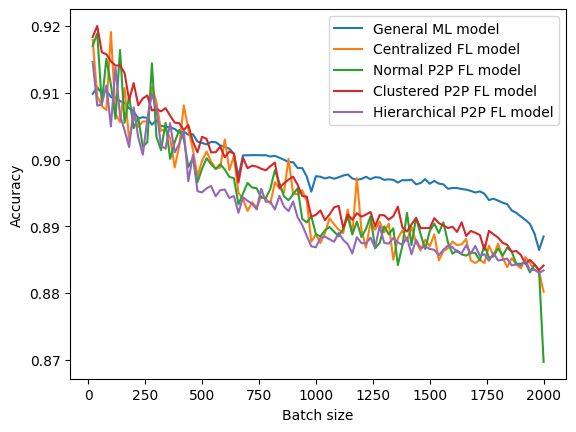

In [78]:
fig = plt.figure()



plt.plot(t_rounds, IID_general_accuracy, label="General ML model")
plt.plot(t_rounds, IID_centralized_accuracy, label="Centralized FL model")
plt.plot(t_rounds, IID_target_accuracy, label="Normal P2P FL model")
plt.plot(t_rounds, IID_clustered_accuracy, label="Clustered P2P FL model")
plt.plot(t_rounds, IID_hierarchical_accuracy, label="Hierarchical P2P FL model")

# plt.plot(t_rounds, IID_homomorphic_accuracy, label="Homomorphic P2P FL model")


# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Batch size")
plt.ylabel("Accuracy")
# plt.title("Accuracy of different models (IID datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend(loc='best')


# To load the display window
plt.show()


# saving the figure
fig_name = "IID/plots/IID_all_accuracy_vs_batch_size_" + str(current_date) + ".png"

fig.patch.set_facecolor('xkcd:white')
fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

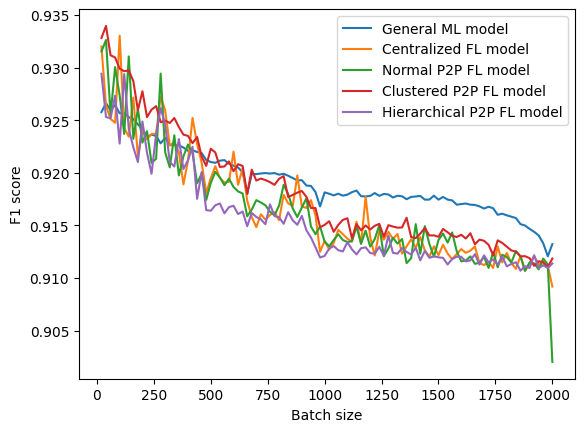

In [79]:
fig = plt.figure()



plt.plot(t_rounds, IID_general_f1_score, label="General ML model")
plt.plot(t_rounds, IID_centralized_f1_score, label="Centralized FL model")
plt.plot(t_rounds, IID_target_f1_score, label="Normal P2P FL model")
plt.plot(t_rounds, IID_clustered_f1_score, label="Clustered P2P FL model")
plt.plot(t_rounds, IID_hierarchical_f1_score, label="Hierarchical P2P FL model")
# plt.plot(t_rounds, IID_homomorphic_f1_score, label="Homomorphic P2P FL model")


# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Batch size")
plt.ylabel("F1 score")
# plt.title("F1 score of different models (IID datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend(loc='best')
  
# To load the display window
plt.show()


# saving the figure
fig_name = "IID/plots/IID_all_f1_score_vs_batch_size_" + str(current_date) + ".png"

fig.patch.set_facecolor('xkcd:white')
fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

# Non-IID

In [ ]:
fig = plt.figure()



plt.plot(t_rounds, non_IID_general_accuracy, label="General ML model")
plt.plot(t_rounds, non_IID_centralized_accuracy, label="Centralized FL model")
plt.plot(t_rounds, non_IID_target_accuracy, label="Normal P2P FL model")
plt.plot(t_rounds, non_IID_clustered_accuracy, label="Clustered P2P FL model")
plt.plot(t_rounds, non_IID_hierarchical_accuracy, label="Hierarchical P2P FL model")


# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Batch size")
plt.ylabel("Accuracy")
# plt.title("Accuracy of different models (non_IID datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend(loc='best')


# To load the display window
plt.show()


# saving the figure
fig_name = "non_IID/plots/non_IID_all_accuracy_vs_batch_size_" + str(current_date) + ".png"

fig.patch.set_facecolor('xkcd:white')
fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

In [ ]:
fig = plt.figure()



plt.plot(t_rounds, non_IID_general_f1_score, label="General ML model")
plt.plot(t_rounds, non_IID_centralized_f1_score, label="Centralized FL model")
plt.plot(t_rounds, non_IID_target_f1_score, label="Normal P2P FL model")
plt.plot(t_rounds, non_IID_clustered_f1_score, label="Clustered P2P FL model")
plt.plot(t_rounds, non_IID_hierarchical_f1_score, label="Hierarchical P2P FL model")


# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Batch size")
plt.ylabel("F1 score")
# plt.title("F1 score of different models (non_IID datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend(loc='best')
  
# To load the display window
plt.show()


# saving the figure
fig_name = "non_IID/plots/non_IID_all_f1_score_vs_batch_size_" + str(current_date) + ".png"

fig.patch.set_facecolor('xkcd:white')
fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

In [ ]:
fig = plt.figure()


plt.plot(t_rounds, random_target_accuracy, label="Normal P2P FL model (Random dataset)")
plt.plot(t_rounds, IID_target_accuracy, label="Normal P2P FL model (IID dataset)")
plt.plot(t_rounds, non_IID_target_accuracy, label="Normal P2P FL model (Non-IID dataset)")

# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Batch size")
plt.ylabel("Accuracy")
# plt.title("Accuracy of different models (non_IID datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend(loc='best')


# To load the display window
plt.show()
